# Lending Club Case Study

## Table of Contents

- [Problem Statement](#problem-statement)
- [Objectives](#objectives)
- [Dataset Analysis](#Dataframe-analysis)
- [Approach](#approach)
- [Case Study Analysis](#case-study-analysis)
- [Conclusions](#conclusions)

## Problem Statement

Lending Club is a consumer finance company like Bajaj Finserv who provides personal loans to urban customers for various reasons depending upon different criteria.

As soon as organization receives a loan request from consumer, it has to make a decision for loan approval based on the profile

_Lending money to the 'potentail risky'_ customers is the biggest cause of financial loss. We can call it _Credit Loss_. It is the money which consumer refuses to pay back to the lender.

When a customer makes a **bad loan**, the customer then marked as **'defaulter'** and the loan is marked as *'charged_off'*loan by the organization.

Main objectives of this case study is to **help the lending organization by identifying potential defaulter** before lending loan and minimize the
**'Credit Loss'**.

Now, there are two usecases where organization may lose credit :-

- Consumers **Likely to repay money**, and if organization will sanction loan for them.
- Consumers **Likely to default loan**, and if Organization will sanction loan for them.

## Objectives

The purpose is to _identify potential defaulters_. Identification of such applicants using data analysis using the given [dataset](./loan.csv), is the main target of this case study.

This will significantly reduce the credit loss for the organization.

From the given dataset we need to identify the **'Core Driving Factors'** using our analysis.

## DataSet Analysis

The dataset provided has the information about loans which were pased previously with defaulter,fully paid or ongoing status. We need to identify the pattern so that we can minimize bad loans.

The dataset has been generated after loan approval and disbursement and does not have any information on rejection procedure.
There are total 111 factors given from which we can summerize the story in three points

- Loan Amount from customer (col:- loan_amnt)
- Amount approved in past (col:- funded_amnt)
- Disbursed amount (col:- funded_amnt_inv)

#### Approach

### Analysis based on Domain Understanding

#### Decision Dataset (loan_status)

- **Loan Accepted** - Three cases

  -**Fully Paid**- Customer paid all the amount with interest
  - **Current** - Customers are paying the installments
  - **Charged-off** - Customer did not pay the installment thus organization marked it as **'defaulter'**.
- **Loan Rejected** - We don't have information about it as rejected.

#### Leading Attribute (loan_status)

- _Loan Status_ - Key Leading Attribute (_loan_status_). The column has three distinct values
  - Fully-Paid - The customer has successfuly paid the loan
  - Charged-Off - The customer is "Charged-Off" ir has "Defaulted"
  - Current - These customers, the loan is currently in progress and cannot contribute to conclusive evidence if the customer will default of pay in future
    - For the given case study, "Current" status rows will be ignored

#### Decision Dataset(loan_status)

- **Loan Accepted** - Three cases

  - _Fully Paid_ - Customer paid all the amount with interest
  - _Current_ - Customers are paying the installments
  - _Charged-off_ - Customer did not pay the installment thus organization marked it as **'defaulter'**.

- **Loan Rejected** - We don't have information about it as rejected.

#### Important Columns

There are total **111** factors given in the dataset.

- **Customer Details**

  - _Annual Income (annual_inc)_ - Annual income of customer. Main factor to see if they can payoff the loan.

  - _Home Ownership (home_ownership)_ - If a customer owns a house then chances of getting loan will increase as organization will have a mortgage item to recover unpaid loan.

  - _Employment Length (emp_length)_ - Organization can check for job stability, Higher the tenure higher the chance to get loan.

  - _Loan(debt) to Income (dti)_ - It is the ratio between loan and income.Lower DTI, higher the chances to get a loan.

  - _State (addr_state)_ - Location of the borrower. We can use it to create a generic demographic analysis.

  - _Purpose (purpose)_ - Cause of the loan. Using this we can analysis which purposes having most defaulters.

  - _Loan Title()_ - The loan title provided by the borrower. Suspicious titles will have lower chances to get the loan.

- **Loan Attributes**

  - _Loan Ammount (loan_amnt)_ - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

  - _Installment (installment)_ - The monthly payment owed by the borrower if the loan originates.

  - _Grades(grade)_ - LC assigned loan grade. From here we can identify which grade of loans has most default cases.

  - _Policy(policy_code)_ - publicly available policy_code=1, new products not publicly available policy_code=2.Policy code 2 are loans made to borrowers that do not meet Lending Club's current credit policy standards. Thus policy 2 askers will have low chances to get the loan.

  - _Loan Date (issue_d)_ - The month which the loan was funded.

  - _Verification Status (verification_status)_ - Indicates if income was verified by LC, not verified, or if the income source was verified.

  - _Interest Rate (int_rate)_ - Interest Rate on the loan.

  - _Public Records (public_rec)_ - Derogatory Public Records.Lower value higher the chance of getting loan.

  - _Public Records Bankruptcy (public_rec_bankruptcy)_ - Number of bankruptcy records publically available. Higher the value, lower is the success rate.

  - _Term (term)_ - Total installment temrm, to repaly the loan.

#### Ignored Columns

Other than above any type of behavioural columns and normal descriptive columns will be ignored.
Also, we will check for the NaN or blank values.
The columns which will have null values more than 80%, anyway those will not contribute us. So we will remove them as well.

### Data Set Analysis based on understanding of EDA
#### Rows Analysis
- Summary data: No summary rows were there in the dataset
- Rows where the value of *loan_status* is *current* will be *dropped* as current loans are in progress and will not contribute for making a decision on passing the new loan.
- We shall check for duplicate rows in the dataset and dropif any.


#### Importing important modules and classes for loading and analyzing Data
- *Numpy* - For Mathematical calculation.
- *Pandas* - for Data load and Manupulation.
- *Matplotlib* - For data plotting.
- *Seaborn* - For better plotting.
Also, we will suppress some warnings and make matplotlib inline.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Reading the data and Checking the necessary matrices
We will read the csv file now using pandas and then check
- *shape* - Rows and columns
- *isnull().sum()* - Check for null values
- *drop()* - Will drop null valued columns upon calculation and also the rows having loan_status=Current
- *dtypes* - To check datatypes of each column
- *head()* -Check columns and data
- *duplicated()* - Check for Duplicate

### Data Cleaning Part-1
After looking for the NaN values in the columns we found below columns having only NaN values thus we dropped those.
`('mths_since_last_major_derog','annual_inc_joint','dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit')`
 And after doing this stop, i found that 'desc' column also has 12k+ null values and as it is a description column, we dropped it as well.
Also, we have checked for duplicated row which is 0.

In [36]:
#Reading Data
df = pd.read_csv('loan.csv',low_memory=False)
df.head (2)
#Check row and columns
df.shape
#Total Rows 39717 and columns 111
#Creating a percentage data to drop columns depending upon NaN percencentage with
#Overall data
check = df.isnull().sum() / len(df)
#Listing the columns which are having only NaN values and these will not contribute any value
cols = list(check[check == 1].index)
len(cols)
#Total 54 columns
#Dropping these columns and fix our dataset
df.drop (cols,axis=1,inplace=True)
#Checking again for empty values
check = df.isnull().sum() / len(df)
cols = list(check[check > 0.5].index)
cols
#['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'] are having
#more than 50% blank data and will not help us to analyze
#Thus dropping these as well.
df.drop (cols,axis=1,inplace=True)
df.isnull().sum()
#desc(Loan description,Infinte Set) column has 12942 NaN out of 39717 rows and this will not add
#value to our dataset, Thus dropping it.
df.drop (['desc'],axis=1,inplace=True)
df.head ()
#Now checking for duplicacy in rows
duplicate = df[df.duplicated()]
duplicate
#No duplicate rows.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


### Data Cleaning Part-2
This time we are deleting those rows having **loan_status value as Current** and all the rows having **any null** values. This will be a legitimate way
to cleaning the dataset as these rows having any null values can create further ambiguity.
After cleaning all these, we have **53 columns and 35365 rows**.

In [37]:
#Clearing All rows having loan_status as current
# Delete rows using drop()
df.drop(df[df['loan_status'] == 'Current'].index, inplace = True)
#Now drop all those rows having any null value as those data are not legitimate for us.
df = df.dropna(how='any',axis=0)
df.shape

(35365, 53)

#### Data Cleaning Part-3
Now we are checking for **other not useful columns** by reiterating again on the description file and found below columns not so useful.
`['id', 'member_id','sub_grade','pymnt_plan', 'url','delinq_2yrs', 'earliest_cr_line','earliest_cr_line',
       'inq_last_6mths', 'open_acc','revol_bal',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med','application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt','tax_liens']`
Thus removing them on this step.

In [38]:
#Checking all column names and checking their decriptions if they are relevant else
#We will drop them
df.columns
#There are some columns seems irrelevent with our study.
#Dropping them
cols_d = ['id', 'member_id','sub_grade','pymnt_plan', 'url','delinq_2yrs', 'earliest_cr_line','earliest_cr_line',
       'inq_last_6mths', 'open_acc','revol_bal',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med','application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt','tax_liens']
df.drop (cols_d,axis=1,inplace=True)
df.shape
#We have currently 23 columns and 35365 unique rows

(35365, 23)

### Checking for NaN values and fill them accordingly
After all data cleanup part, We have **23 columns and 35365 unique rows**. We will check now for the null values again and fill them like below
- If data is a **categorical variable** them will fill them with **Mode**.
- If **Quantitive variable**, we will fill them with **Median**.

***Main methods we will use***
- fillna() - To fill NaN values.

**After checking for null values, we have not gotten any at this stage.**

In [39]:
#Checking for Null values on Final dataset
df.isnull().sum()
#We need to check datatypes now and according to that we will fillup those values

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
pub_rec                 0
revol_util              0
policy_code             0
pub_rec_bankruptcies    0
dtype: int64

### Manupluating (Changing) the datatypes of the columns as per need

We will now check the datatypes of each columns and where we will see that data is **numeric type or there is a concatenation between numeric and string, we will comvert them into numreric datatype for the sake of analysis**.

- **term** - It must be in integer but it is object (String) type thus we will change it accordingly.
- **revol_util** - It must be float without percentage sign
- **int_rate** - It is also object type and we will convert it as float.
- **issue_d** - **_It is object type. For the sake of our analysis we are going to split it and create two different columns with Month and year._**
  Month will be **issue_month** and year **issue_year**. - **issue_month** - It is the first 3 initials of any month. **E.g. January-Jan,March-Mar,August-Aug** likewise. - **issue_year** - It is in 2000. E.g. **11 -> 2011, 08 -> 2008** likewise.
  **_Thus the value e.g. in dataset Dec-11 will be Dec and 2011 in two different columns._** And then we will drop **issue_d** column.

- **emp_length** - emp_length has also data like <1 year 10+ years which is not usable in analysis. Thus we need to normalize this data as well.Assuming <1 Year as 0 and 10+ year as 11 and converting the whole data into integer.
  We have found unique values -> **['< 1 year', '10+ years', '3 years', '8 years', '9 years','5 years', '4 years', '1 year', '6 years', '2 years', '7years']**.

  ***Conversion Assumptions***
  - **<1 year** - *0*
  - **10+ Years** - *11*
  - **Others will be as it is in integer value.**

Methods we will use

- **unique()** - Will give us the unique values of a column
- **apply()** - We can apply different function on the datatypes of columns and rows.
- **reset_index()** - To reset index serials.

In [40]:
#Check datatypes
df.dtypes
#We need to convert term and int_rate into numeric
#Checking unique values of each types
df.term.unique()
#Two unique values in the format [' 60 months', ' 36 months']
#Converting it into integer
df['term'] = df['term'].apply (lambda x : int(x[:3]))

#Checking unique values for revol_util
df.revol_util.unique()
#Values are like 0%, 98.7%
#Manupulating the data
df['revol_util'] = df['revol_util'].apply (lambda x : float(x.strip().split("%")[0]))
#Checking unique values of int_rate
df.int_rate.unique()
#Data is like 15.27% with a leading space.
#Converting it into float
df['int_rate'] = df['int_rate'].apply (lambda x : float(x.strip().split("%")[0]))
df.int_rate.unique()
#Checking unique values of issue_d
df.issue_d.unique()
#Data is like Dec-11.
#We will create two separate column for year and month from here for the ease of calculation
#Writing a function to manupulate month and year
df ['issue_month'] = df['issue_d'].apply (lambda x : x.split('-')[0])
df['issue_year'] = df['issue_d'].apply (lambda x :(int(x.split('-')[1])+2000))
#Dropping issue_d as we have already manupulated it
df.drop(['issue_d'],axis=1,inplace=True)
#Cheking the dataset
df.head(20)
#By checking the first 20 values we have seen that funded_amnt_inv has 4 decimal data.
#Rounding off into two decimal points
df ['funded_amnt_inv'] = df['funded_amnt_inv'].apply (lambda x : round(x,2))

#emp_length has also data like <1 year 10+ years which is not usable in analysis
#Thus we need to normalize this data as well.
#Assuming <1 Year as 0 and 10+ year as 11 and converting the whole data into integer
df.emp_length.unique ()
#Unique Values - ['< 1 year', '10+ years', '3 years', '8 years', '9 years',
#       '5 years', '4 years', '1 year', '6 years', '2 years', '7 years']
#Creating function to comvert
def convert_emp_length_into_integer (data:str) -> int :
    if (data == '< 1 year'):
        return 0
    elif (data == '10+ years'):
        return 11
    else:
        return int (data.strip().split(' ')[0])

df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply (lambda x : int(x))

df['emp_length'] = df['emp_length'].apply (convert_emp_length_into_integer)
#source_verified columns has three unique values, source verified,verified and not verified
#Normalizing the data verified and source verified with verified
df['verification_status'] = df['verification_status'].apply(lambda x : 'Verified' if x == 'Source Verified' else x)
#Cheking the dataset
df.head(20)
#Reseting the index as index values are not serially populated due to drops
df.reset_index(drop=True,inplace = True)
df.head(20)
df.shape

(35365, 24)

### Data Cleaning and Manupulation summary after completion

Finally we have **24 not null columns and 35365 unique not null rows_** to work on analytics and prediction.

#### Columns for analytics

- 'loan_amnt',
- 'funded_amnt'
- 'funded_amnt_inv'
- 'term'
- 'int_rate'
- 'installment'
- 'grade'
- 'emp_title'
- 'emp_length'
- 'home_ownership'
- 'annual_inc'
- 'verification_status'
- 'loan_status'
- 'purpose'
- 'title'
- 'zip_code'
- **revol_util**
- 'addr_state'
- 'dti'
- 'pub_rec'
- 'policy_code'
- 'pub_rec_bankruptcies'
- 'issue_month'
- 'issue_year'

We have manupulated and changed the datatypes of below columns

- **term**
- **int_rate**
- **issue_d** - We have dropped it as we have added two different columns for month and year
- **pub_rec_bankruptcies**
- **emp_length** - We have changed the values.
- **funded_amnt_inv** - We have rounded off to 2 decimal points.

#### Analytics

There are three types of analysis for EDA

- **Univariate Analysis**
- **BiVariate Analysis**
- **Multivariate Analysis**

Upon checking the columns and data, we are going to plot and analysis the data.

## Removing Outliers

We will use **1.5IQR** on all the numeric variable's data to deal with outliers.
**Formula of IQR** -- **q3-q1**
We use **IQR** to check the spread of the data.

After removing outliers we have found below columns having Null values again which we filled with median

- **loan_amnt 1008**
- **funded_amnt 866**
- **pub_rec 1849**

### Adding A new Column
We have created one new column names **loan_status_boolean** for the ease of analytics and plotting. Here **Charged offs are False** and **Fully Paid are True**.

In [41]:

def remove_outliers (data:str) -> None:
    """
    We will pass column names as data and this function will remove the outliers
    from them.
    """
    #Soring the values in ascending order
    sorted_data = df[data].sort_values()
    #Calculation First and third Quartiles
    q1=sorted_data.quantile(0.25)
    q3=sorted_data.quantile(0.75)
    #Calculation IQR
    iqr = q3 - q1
    #Setting intervals
    upper_limit=q1-1.5*iqr
    lower_limit=q3+1.5*iqr
    #Final column values without Outliers
    final_data=sorted_data[~((sorted_data<(upper_limit))  |  (sorted_data>(lower_limit)))]
    #Assign the series to the column
    df[data] = final_data

for x in list((df.select_dtypes(exclude=[object])).columns):
    #print (x)
    if (x not in ['issue_year','pub_rec_bankruptcies']):
        remove_outliers (x)
    
#print (df['annual_inc'].dtype)
#Checking for Null values again as we removed outliers
df.isnull().sum()
#After removing outliers we have Null

#loan_amnt 1008
#funded_amnt 866
#pub_rec 1849
#funded_amnt_inv  831
#int_rate          48
#installment     1249
#annual_inc      1620
#pub_rec_bankruptcies  1467
#Now we will fill these NaNs by medians
#df['loan_amnt'].fillna (df['loan_amnt'].median(),inplace=True)
#df['funded_amnt'].fillna (df['funded_amnt'].median(),inplace=True)
#df['pub_rec'].fillna (df['pub_rec'].median(),inplace=True)
#Checking record again

list_null = ['loan_amnt','funded_amnt','pub_rec','funded_amnt_inv','int_rate','installment','annual_inc','pub_rec_bankruptcies']
for x in list_null:
    df[x].fillna (df[x].median(),inplace=True)

df.isnull().sum()
df.head ()

### We are going to make a new column with True and False on the basis of Loan Status for better analysis
df['loan_status_boolean'] = df['loan_status'].apply (lambda x : True if x == 'Fully Paid' else False)
#Here Charged Off False and Fully Paid is True
df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
pub_rec                 0
revol_util              0
policy_code             0
pub_rec_bankruptcies    0
issue_month             0
issue_year              0
loan_status_boolean     0
dtype: int64

### Univariate Analysis

We will mostly use **countplot**,**barplot**, **histogram** and **density curve** to draw our conclusions with **loan_status**.

Variable names
- **house_ownership**
- **purpose**
- **verification_status**
- **addr_state**
- **issue_year**
- **issue_month**
- **grade**
- **revol_util**
- **term**
- **annual_inc**
- **loan_amnt**
- **funded_amnt_inv**
- **pub_rec_bankruptcies**
- **emp_length**
- **int_rate**
- **dti**
- **installment**

### Univariate Analysis ****Frequency of loan_status****

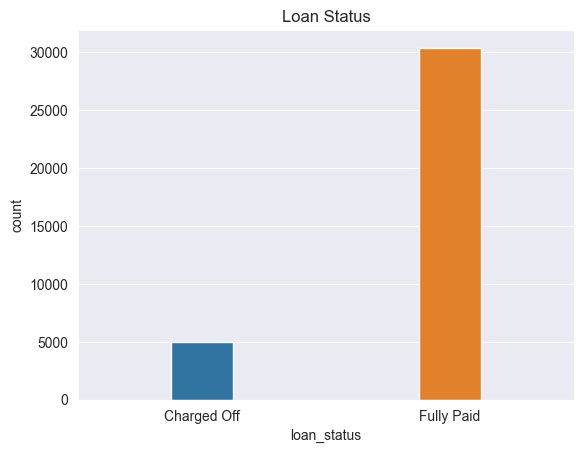

0    Fully Paid
Name: loan_status, dtype: object

In [59]:
#We will plot countplot to check the relation
sns.set_style ('darkgrid')

sns.countplot (x='loan_status',data=df,width=0.25,palette=sns.color_palette())
plt.title ('Loan Status')
plt.show()
df['loan_status'].mode() #Rent
#Outcome- Number of fully paid loans are more.

### Univariate Analysis  ****Frequency of home_ownership****

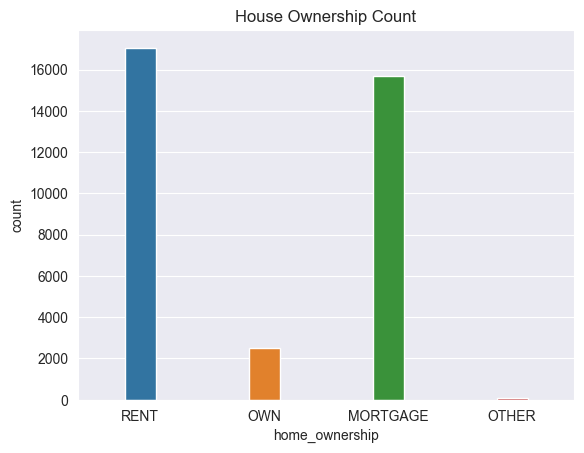

0    RENT
Name: home_ownership, dtype: object

In [436]:
#We will plot countplot to check the relation
sns.set_style ('darkgrid')

sns.countplot (x='home_ownership',data=df,width=0.25,palette=sns.color_palette())
plt.title ('House Ownership Count')
plt.show()
df['home_ownership'].mode() #Rent
#Outcome- Most loan applicants live in rented house(mode --> Rent) or house which is already under mortgage. 

### Univariate Analysis  ****Frequency of purpose****


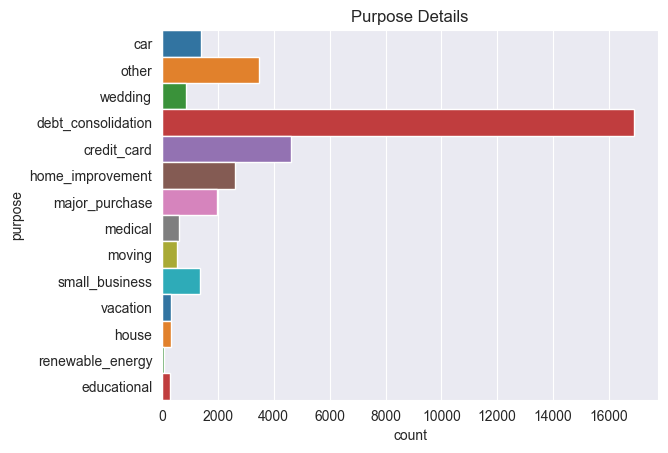

0    debt_consolidation
Name: purpose, dtype: object

In [437]:
#We will plot countplot to check the relation
sns.set_style ('darkgrid')
plt.title ('Purpose Details')
sns.countplot (y='purpose',data=df,width=1,palette=sns.color_palette())
plt.show()
df['purpose'].mode() #debt consolidation
#Outcome- We can clearly see that most of the applicants applied for loan to payoff another(mode:- debt_consolidation)loan.

### Univariate Analysis  ****Frequency of Verification_Status****


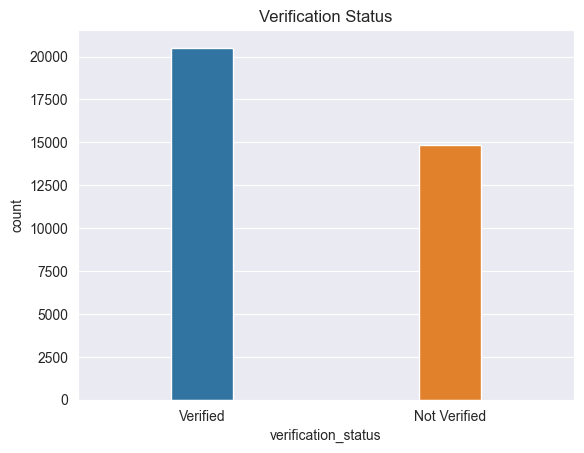

0    Verified
Name: verification_status, dtype: object

In [438]:
#We will plot countplot to check the relation
sns.set_style ('darkgrid')
plt.title ('Verification Status')
sns.countplot (x='verification_status',data=df,width=0.25,palette=sns.color_palette())
plt.show()
df['verification_status'].mode() #Verified
#Outcome- We can clearly see that most of the applicants are verified..

### Univariate Analysis  ****Frequency of state address****


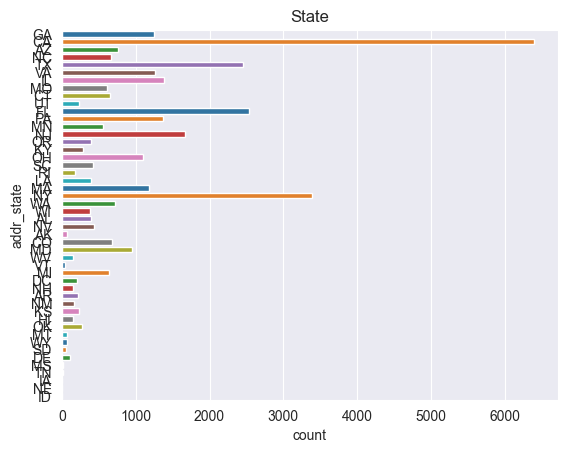

0    CA
Name: addr_state, dtype: object

In [439]:
#We will plot countplot to check the relation
sns.set_style ('darkgrid')
plt.title ('State')
sns.countplot (y='addr_state',data=df,width=0.7,palette=sns.color_palette())
plt.show()
df['addr_state'].mode() #CA
#Outcome- CA has most number of loan applicants

### Univariate Analysis  ****Frequency of month of loan issue****

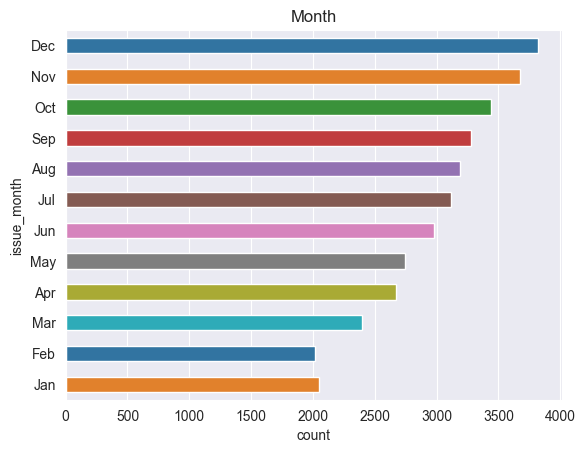

0    Dec
Name: issue_month, dtype: object

In [440]:
#We will plot countplot to check the relation
sns.set_style ('darkgrid')
plt.title ('Month')
sns.countplot (y='issue_month',data=df,width=0.5,palette=sns.color_palette())
plt.show()
df['issue_month'].mode() #Dec
#Outcome- December month has most received loan applications

### Univariate Analysis ****Frequency of year of loan issue****


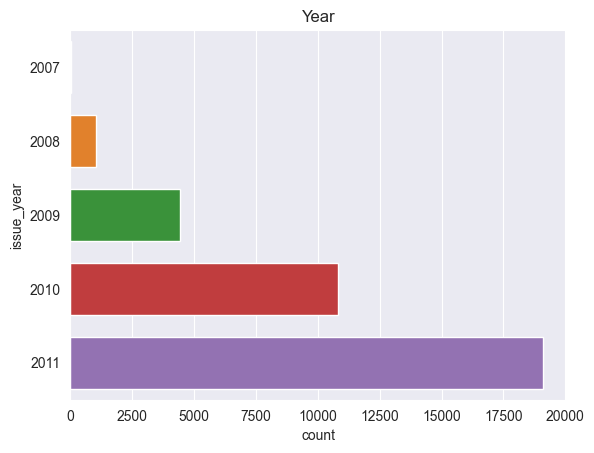

0    2011
Name: issue_year, dtype: int64

In [441]:
#Univariate Analysis- derived column Year
#year count
#We will plot countplot to check the relation
sns.set_style ('darkgrid')
plt.title ('Year')
sns.countplot (y='issue_year',data=df,width=0.7,palette=sns.color_palette())
plt.show()
df['issue_year'].mode() #2011
#Outcome- Year 2011 has most number of applicants

### Univariate Analysis ****Frequency of Loan Grade****


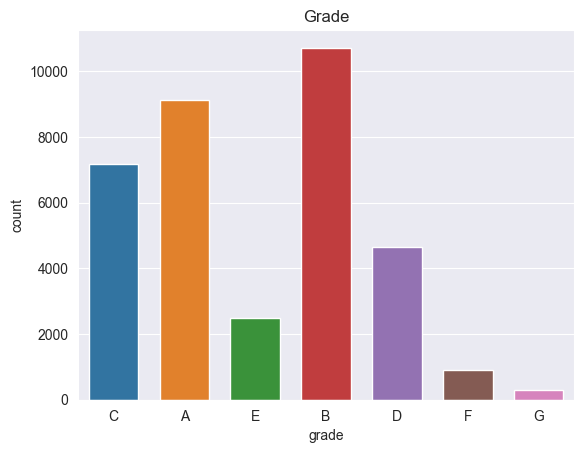

0    B
Name: grade, dtype: object

In [442]:
#We will plot countplot to check the relation
sns.set_style ('darkgrid')
plt.title ('Grade')
sns.countplot (x='grade',data=df,width=0.7,palette=sns.color_palette())
plt.show()
df['grade'].mode() #B
#Outcome- Most of the applicants are part of Grade B

### Univariate Analysis ****Frequency of term****


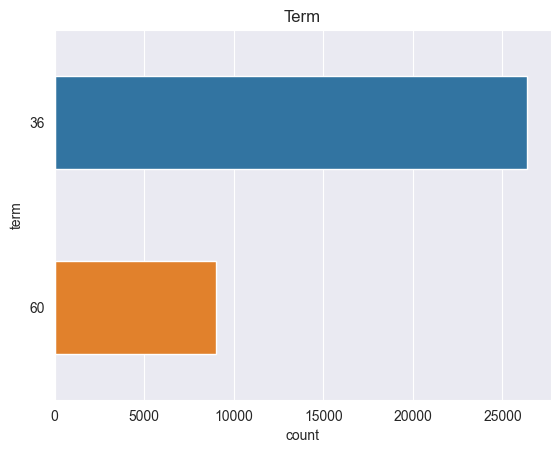

0    36
Name: term, dtype: int64

In [443]:
#We will plot countplot to check the relation
sns.set_style ('darkgrid')
plt.title ('Term')
sns.countplot (y='term',data=df,width=0.5,palette=sns.color_palette())
plt.show()
df['term'].mode() #36
#Outcome- Most of the applicants are applied for 36 months loans.

### Univariate Analysis ****Frequency of employment length****


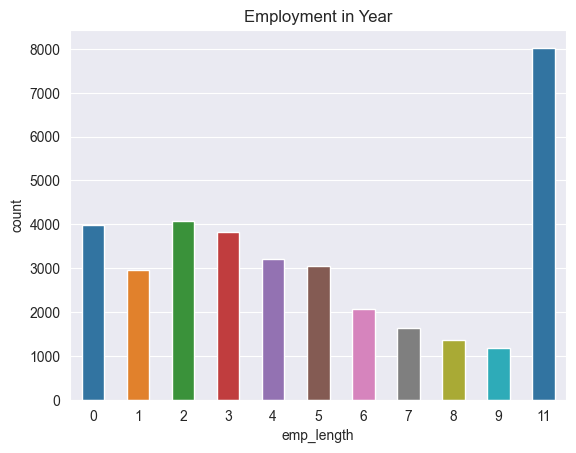

0    11
Name: emp_length, dtype: int64

In [444]:
#Univariate Analysis- emp_length
#emp_length count
#We will plot countplot to check the relation
sns.set_style ('darkgrid')
plt.title ('Employment in Year')
sns.countplot (x='emp_length',data=df,width=0.5,palette=sns.color_palette())
plt.show()
df['emp_length'].mode() #11
#Outcome- Most of the applicants are in their current job for 10+ Years.

### Univariate Analysis ****Frequency of public record for banruptcies****


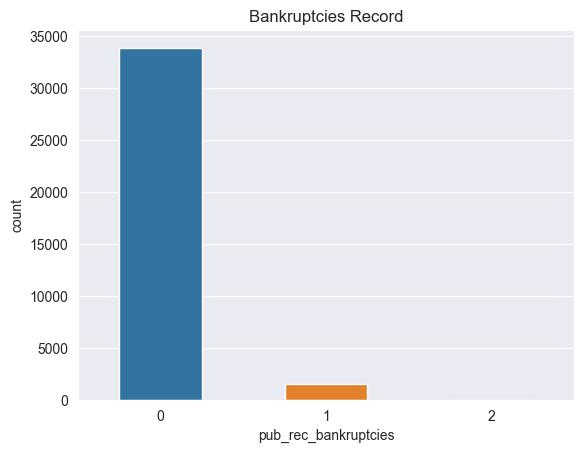

0    0
Name: pub_rec_bankruptcies, dtype: int64

In [445]:
#Univariate Analysis- pub_rec_bankruptcies
#pub_rec_bankruptcies count
#We will plot countplot to check the relation
sns.set_style ('darkgrid')
plt.title ('Bankruptcies Record')
sns.countplot (x='pub_rec_bankruptcies',data=df,width=0.5,palette=sns.color_palette())
plt.show()
df['pub_rec_bankruptcies'].mode() #0.0
#Outcome- Most of the applicants do not have any bankruptcy record.

### Univariate Analysis  ****Distribution and Spread of loan amount****


0    10000.0
Name: loan_amnt, dtype: float64

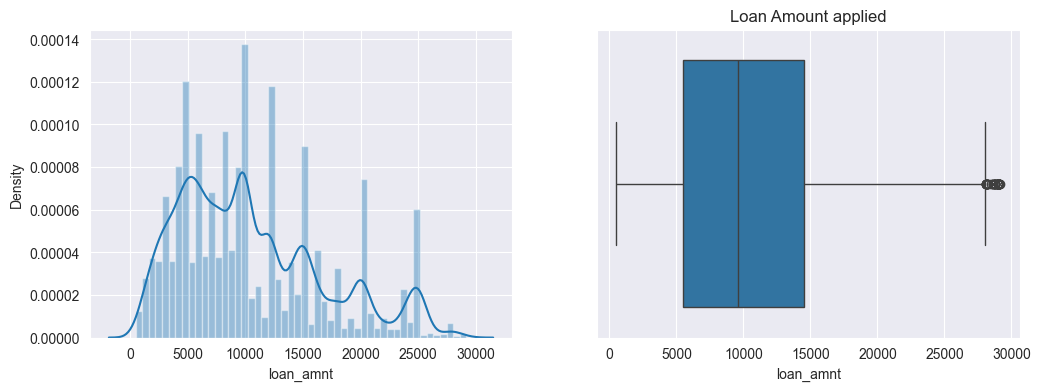

In [446]:
#Univariate Analysis- loan_amnt
#We will plot density curve and boxplot
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.distplot(df['loan_amnt'],ax=ax[0],kde=True, hist=True)
#To see if outliers are still there
sns.boxplot(x = df['loan_amnt'],ax=ax[1])
plt.title ('Loan Amount applied')
fig.show()
df['loan_amnt'].describe().T
df['loan_amnt'].mode()
#Outcome- Applied loan amount is lied between 2500(Q1) to 14500(Q3).

### Univariate Analysis  ****Distribution and Spread of approved funded amount****


0    10000.0
Name: funded_amnt_inv, dtype: float64

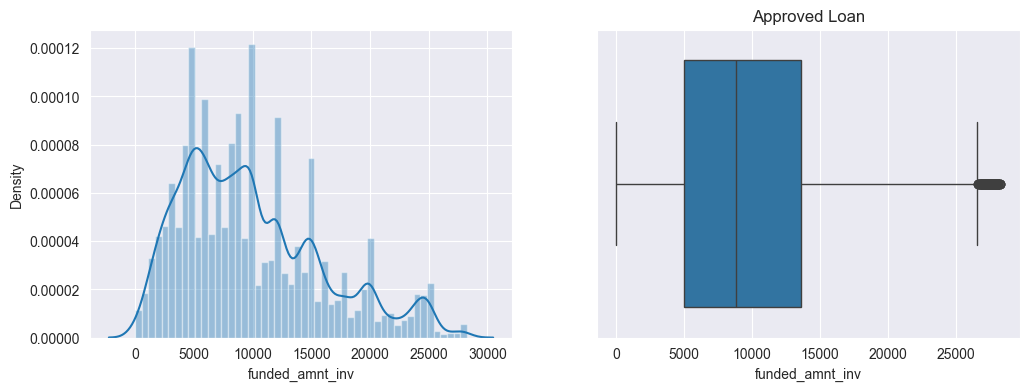

In [447]:
#Univariate Analysis- funded_amnt_inv
#We will plot density curve and boxplot
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.distplot(df['funded_amnt_inv'],ax=ax[0],kde=True, hist=True)
#To see if outliers are still there
sns.boxplot(x = df['funded_amnt_inv'],ax=ax[1])
plt.title ('Approved Loan')
fig.show()
df['funded_amnt_inv'].describe().T
df['funded_amnt_inv'].mode()
#Outcome- Approved loan amounts are varring between 5k to 14k (Q1 and Q3)

### Univariate Analysis  ****Distribution and Spread of annual income****


0    57000.0
Name: annual_inc, dtype: float64

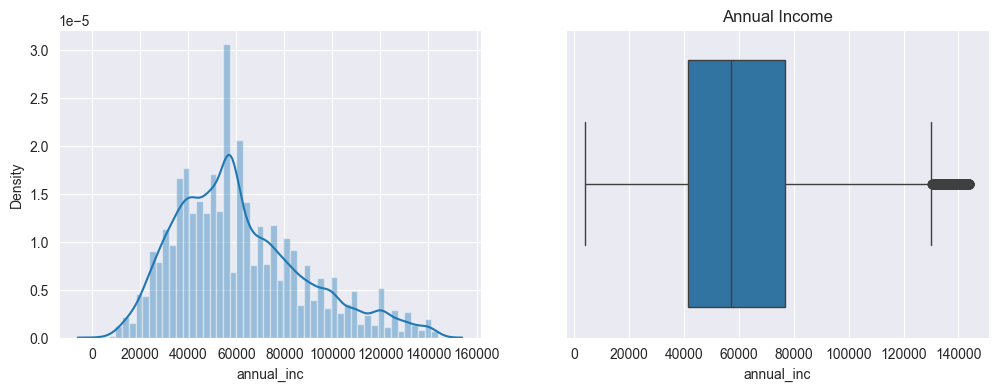

In [448]:
#We will plot density curve and boxplot
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.distplot(df['annual_inc'],ax=ax[0],kde=True, hist=True)
#To see if outliers are still there
sns.boxplot(x = df['annual_inc'],ax=ax[1])
plt.title ('Annual Income')
fig.show()
df['annual_inc'].describe().T
df['annual_inc'].mode()
#Outcome- Maximum Customers applied for loan are in income group between 41k to 125k annually

### Distribution and Spread of revol_util **Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit**.


count    35365.000000
mean        49.138820
std         28.228489
min          0.000000
25%         25.900000
50%         49.700000
75%         72.600000
max         99.900000
Name: revol_util, dtype: float64

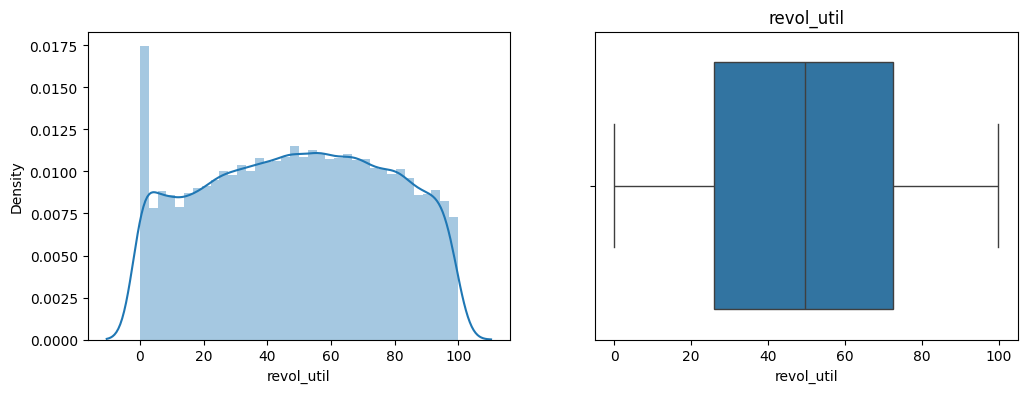

In [43]:
#We will plot density curve and boxplot
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.distplot(df['revol_util'],ax=ax[0],kde=True, hist=True)
#To see if outliers are still there
sns.boxplot(x = df['revol_util'],ax=ax[1])
plt.title ('revol_util')
fig.show()
df['revol_util'].describe().T
#df['revol_util'].mode()
#Outcome- Maximum loan applicatns are between 25 to 72.

### Univariate Analysis  ****Distribution and Spread of debt to income ratio****


count    35365.000000
mean        13.404126
std          6.636652
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

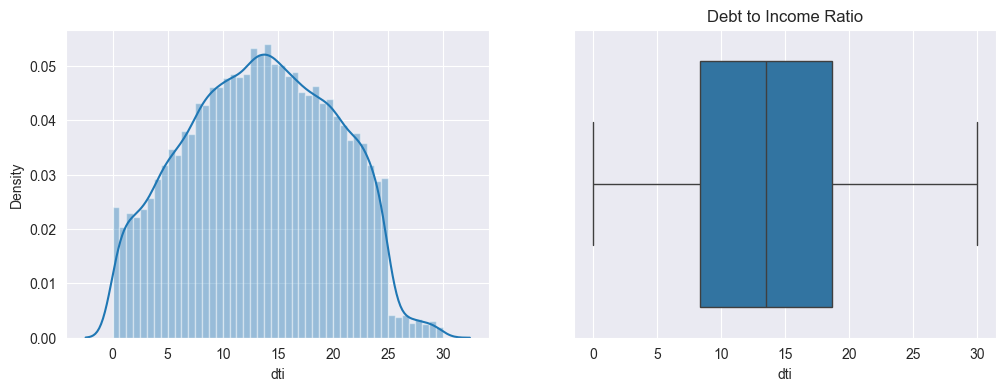

In [449]:
#Univariate Analysis- dti
#We will plot density curve and boxplot
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.distplot(df['dti'],ax=ax[0],kde=True, hist=True)
#To see if outliers are still there
sns.boxplot(x = df['dti'],ax=ax[1])
plt.title ('Debt to Income Ratio')
fig.show()
df['dti'].describe().T
#Outcome- Maximum Customers applied for loan are between 8 to 18

### Univariate Analysis ****Distribution and Spread of interest rate****
 

count    35365.000000
mean        11.967777
std          3.678547
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         22.740000
Name: int_rate, dtype: float64

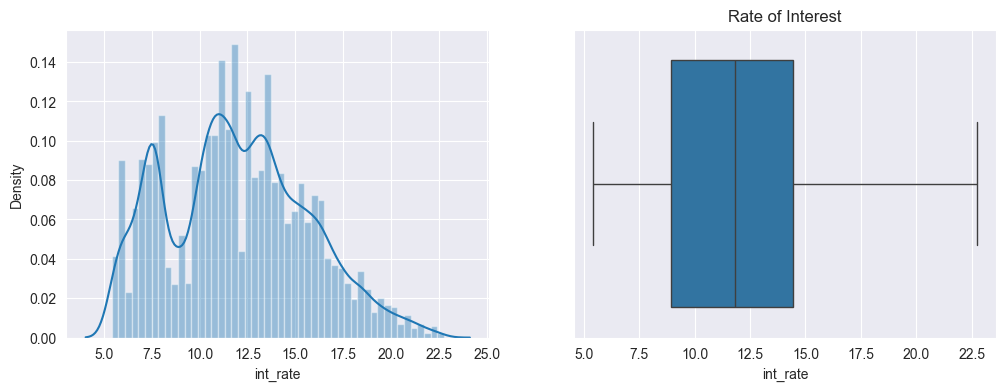

In [450]:
#We will plot density curve and boxplot
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.distplot(df['int_rate'],ax=ax[0],kde=True, hist=True)
#To see if outliers are still there
sns.boxplot(x = df['int_rate'],ax=ax[1])
plt.title ('Rate of Interest')
fig.show()
df['int_rate'].describe().T
#Outcome- Rate of interests are majorly varrying between 8 to 14% 

### Univariate Analysis ****Distribution and Spread of installment****
 

count    35365.000000
mean       301.251648
std        172.100192
min         16.080000
25%        167.840000
50%        272.135000
75%        397.610000
max        814.340000
Name: installment, dtype: float64

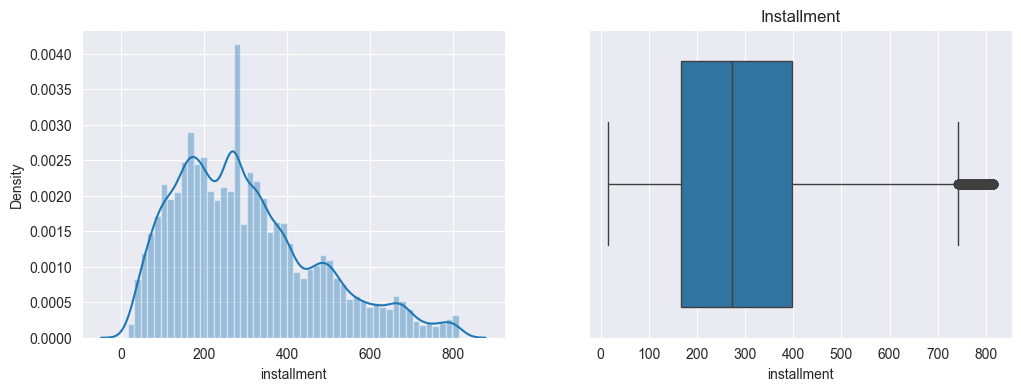

In [451]:
#We will plot density curve and boxplot
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.distplot(df['installment'],ax=ax[0],kde=True, hist=True)
#To see if outliers are still there
sns.boxplot(x = df['installment'],ax=ax[1])
plt.title ('Installment')
fig.show()
df['installment'].describe().T
#Outcome- Monthly Installments are varrying between 167 to 397 average.

### Multivariate Analysis
 ****Correlation Between annual_inc','loan_amnt','funded_amnt_inv','term****

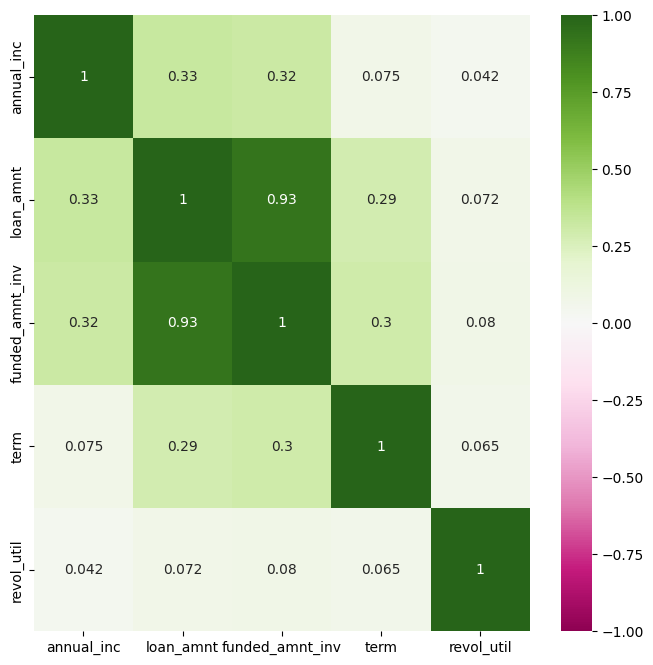

In [44]:
#Checking for correlation between (Multivariate to check the correlation)
cr = df.loc[:, [ 'annual_inc','loan_amnt','funded_amnt_inv','term','revol_util']].corr()
plt.figure(figsize = (8,8))
sns.heatmap(cr,vmax=1,vmin=-1,annot = True, cmap='PiYG')
plt.show()
#Outcome:- From the heatmap we can clearly see that annual_inc,loan_amnt and funded_amnt_inv and revol_util are positively correlated but with term
#There is near to 0 relation between tenure and annual_income
#Also there is highly positive correlation between loan_amount and Tenure

## Analysis Summary

### Loan Analysis:-

- Most of the loan amount applications fall in the range of 3k to 9.7k.
- Max and Min Interest rate are 5.4% and 22.7% respectively.
- Most of the applications fall under Grade-B.
- Most of the applicants are from 40% to 45% credit utilization group.
- Most of the applicants have asked for 36 months tenure.
- Most of the installments are between 25 to 400.

### Applicants Analysis:-

- Maximum applicants have applied for 10k loan amount.
- Maximum reason for loan is debt_consolidation
- Maximum number of debt asking state is CA.
- Majority of loan applicants do not own house.
- Most of times sanctioned loan maount is funded.
- Maximum applicants fall between 4k to 60k income bracket.

### Yearly & Monthly (Time Series) analysis:-

- Max loan applications have been submitted in year 2011.
- Max loan applications have been submitted in month December.

### Correlation between loan and applicants' attributes

Upon checking the correlation between these data we found that there is a positive correlation between annual income, loan amount and funded amount.
Same is with tenure and loan amount.

But we can not draw a conclusion till now as we need to compare variables with eachother to get a specific pattern.

### Bi-Variate Analysis (Plotting relations between loan_status and other variables)

### Relation with term and loan_status

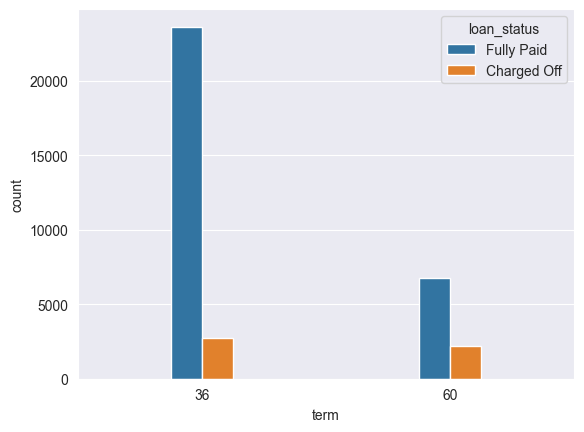

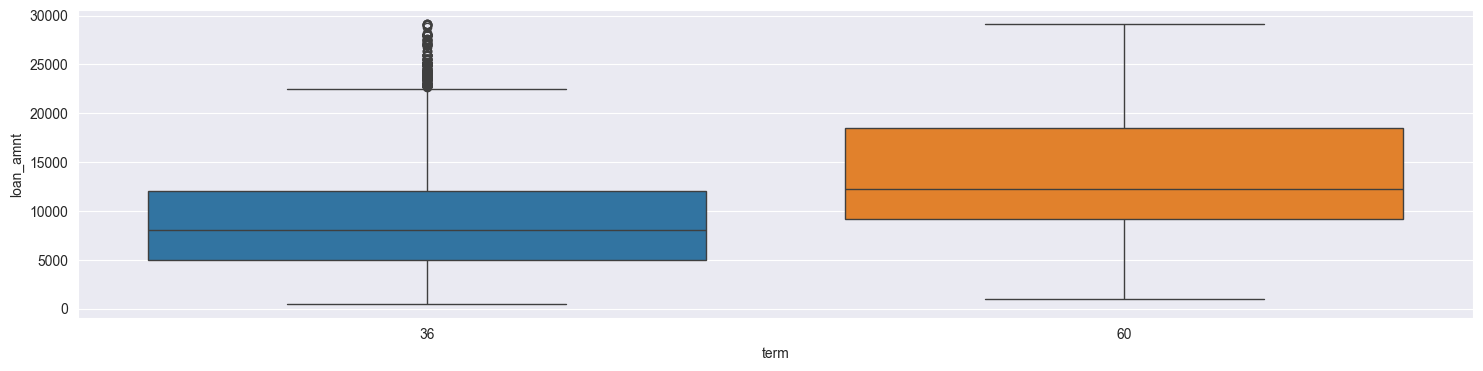

In [46]:
sns.set_style('darkgrid')
sns.countplot (x='term',data=df,width=0.25,palette = sns.color_palette(),hue='loan_status')
plt.show()
#Computation
chargedoff_36 = len((df[(df['term'] == 36) & (df['loan_status'] == 'Charged Off')]).index)#2729
chargedoff_36 
chargedoff_60 = len((df[(df['term'] == 60) & (df['loan_status'] == 'Charged Off')]).index)#2213
chargedoff_60
(chargedoff_36/len(df[df['term'] == 36])) > (chargedoff_60/len(df[df['term'] == 60])) #False
#Outcome :- 36 Month tenure has more fully_paid customers and also has more number of defaulters but when we go by ratio,
#60 month has more defaulter than 36 months tenure
#Plotting Box to check the median level to identify risk
plt.figure(figsize=(18,4))
sns.boxplot(y=df.loan_amnt,x=df.term,palette = sns.color_palette())
plt.show()
# Analysis:- Thus most of the 60 month tenure choosers having more chance to default

### Functions for analysis

In [47]:
#As we need to use loan_status with multiple other variables to check
#We are making a function to do it
def calculate_percentage_chargedoff (column_name:str) -> object:
    """
    This is to calculate percentage of charged off with overall to get the analysis
    Also, we 
    """
    d = {}
    list_unq = list(df[column_name].unique())
    for x in list_unq:
        count = len((df[(df[column_name] == x) & (df['loan_status'] == 'Charged Off')]).index)
        percentage = (count/len(df[(df[column_name] == x)])) * 100
        d[str(x)] = percentage
    return pd.DataFrame (d,index=[0])

def countplot_loan_status(column_name:object) -> None:
    """
    It is for categorical vs categorical variable
    """
    plt.figure(figsize=(18,4))
    sns.set_style('darkgrid')
    sns.countplot (x=column_name,data=df,width=0.25,palette = sns.color_palette(),hue='loan_status')
    plt.show()

def histplot_continous_vs_loan_status (x:str) -> None:
    sns.set_style('darkgrid')
    sns.histplot (x=df[x],hue=df['loan_status'])
    plt.show()

def bivariate_analysis_categorical_data (x:str, y:str) -> None:
    """
        x,y are the column names shich we need to pass
    """
    fig, ax = plt.subplots(figsize=(12,8))
    df1 = pd.pivot_table(data=df, values='loan_status_boolean', index=y, columns=x)
    sns.heatmap(df1, ax=ax,annot=True,vmin=-1,vmax=1,cmap='YlOrBr')
    plt.show()

def bivariate_analysis_numerical_data (x:str, y:str) -> None:
    """
      x,y are the column names shich we need to pass
    """
    sns.set_style('darkgrid')
    plt.figure(figsize=(8,8))
    sns.scatterplot (data=df,x=x,y=y,hue='loan_status')
    plt.show()
    #ClusterMap
    sns.clustermap(df[[x,y]].corr(), cmap='YlOrRd',figsize=(8,8))
    plt.show()
    #Printing Correlation coefficient value
    print (df[[x,y]].corr(method='pearson'))

#bivariate_analysis_numerical_data ('loan_amnt','funded_amnt')
#bivariate_analysis_categorical_data ('purpose', 'grade')
#Checking dataset
df.head ()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec,revol_util,policy_code,pub_rec_bankruptcies,issue_month,issue_year,loan_status_boolean
0,2500.0,2500.0,2500.0,60,15.27,59.83,C,Ryder,0,RENT,30000.0,Verified,Charged Off,car,bike,309xx,GA,1.00,0.0,9.4,1,0,Dec,2011,False
1,10000.0,10000.0,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,11,RENT,49200.0,Verified,Fully Paid,other,personel,917xx,CA,20.00,0.0,21.0,1,0,Dec,2011,True
2,5000.0,5000.0,5000.0,36,7.90,156.46,A,Veolia Transportaton,3,RENT,36000.0,Verified,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,28.3,1,0,Dec,2011,True
3,7000.0,7000.0,7000.0,60,15.96,170.08,C,Southern Star Photography,8,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0.0,85.6,1,0,Dec,2011,True
4,3000.0,3000.0,3000.0,36,18.64,109.43,E,MKC Accounting,9,RENT,48000.0,Verified,Fully Paid,car,Car Downpayment,900xx,CA,5.35,0.0,87.5,1,0,Dec,2011,True


### Relation with emp_length and loan_status

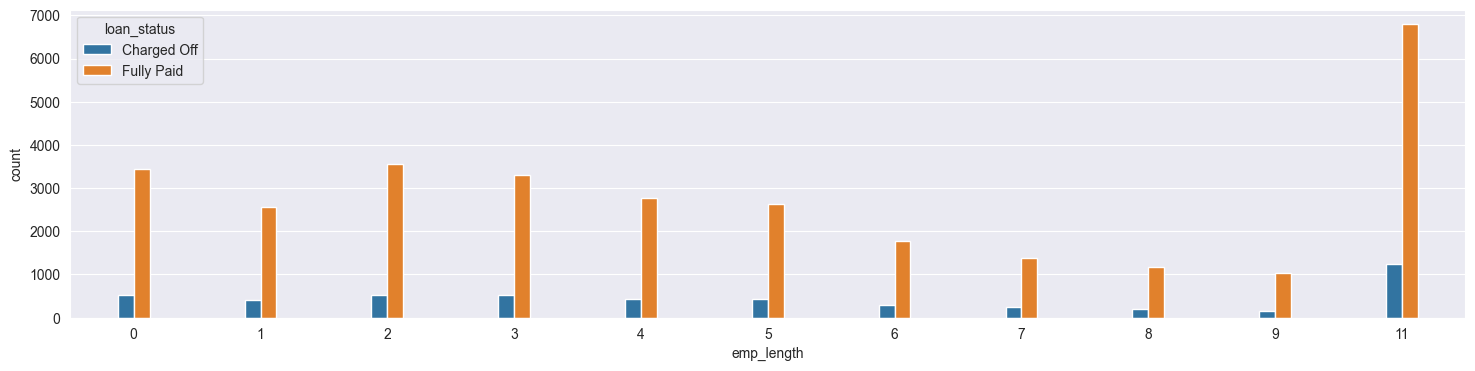

,0,11,3,8,9,5,4,1,6,2,7
0,13.323278,15.358744,13.592486,14.033799,12.5,13.867894,13.318777,13.788442,13.918526,12.938005,15.140415


In [48]:
countplot_loan_status ('emp_length')
#Computation
xx = calculate_percentage_chargedoff ('emp_length')
xx
#Analysis:- 10+ years of employment length has more defaulters but also having highest number of full paid as well. Thus it is not
#conclusive

### Purpose vs Loan Status

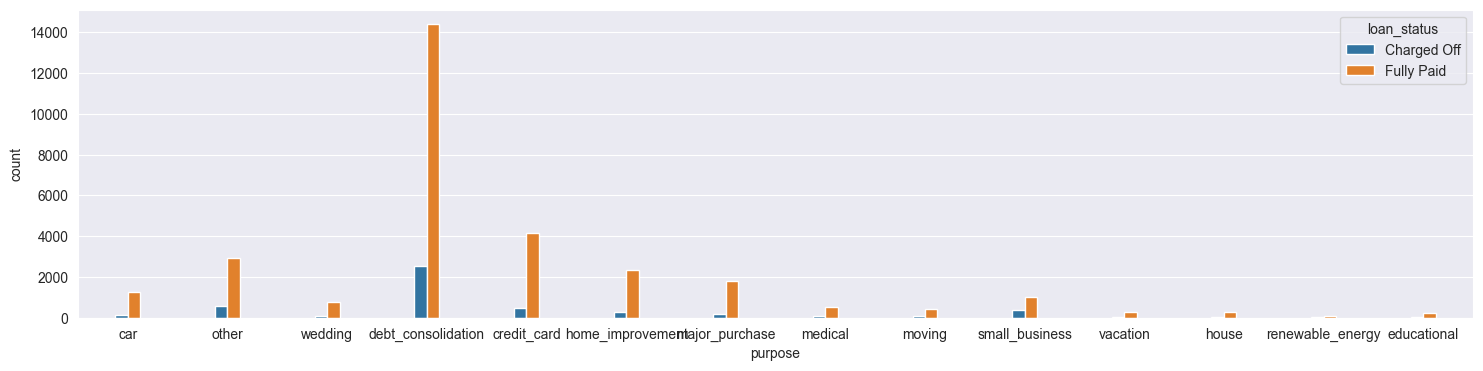

,car,other,wedding,debt_consolidation,credit_card,home_improvement,major_purchase,medical,moving,small_business,vacation,house,renewable_energy,educational
0,10.681004,15.771231,9.595376,14.832338,10.354518,11.323642,9.630005,15.273312,15.105163,26.350851,14.759036,15.757576,17.241379,16.304348


In [457]:
countplot_loan_status ('purpose')
xx = calculate_percentage_chargedoff ('purpose')
xx
#Analysis:- People who took loan for small business has highest number of defaulters by ratio but debt_consolidation's median is high.
#Thus high chance to get defaulter.

### Grade vs Loan Status¶

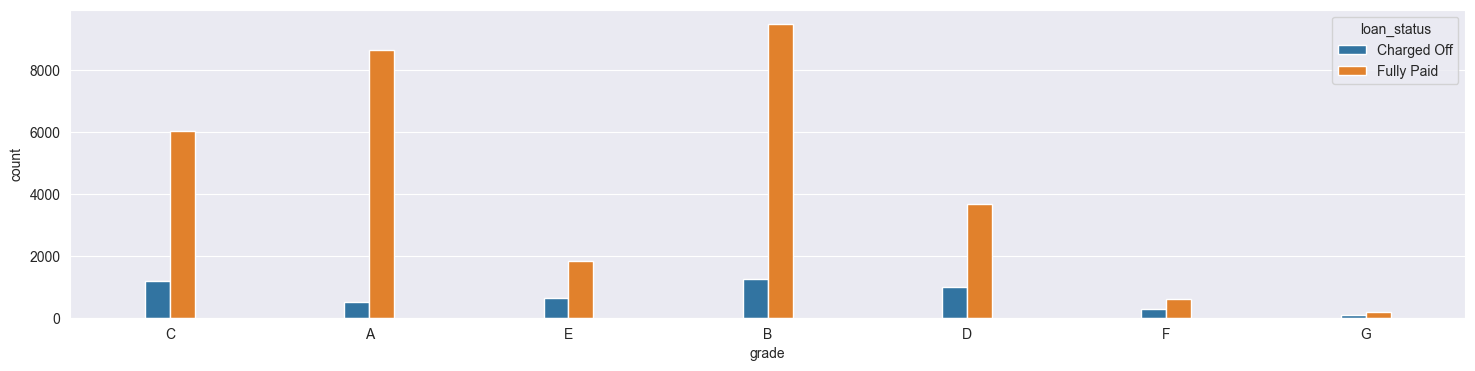

,C,A,E,B,D,F,G
0,16.281337,5.612691,26.118501,11.690614,21.021021,31.707317,32.978723


In [458]:
countplot_loan_status ('grade')
#Plotting Box to check the median level to identify risk
xx = calculate_percentage_chargedoff ('grade')
xx
#Analysis:- Loan Grade G has highest charge off and c grade has the high probablity to get defaulter.

### House ownership vs Loan Status

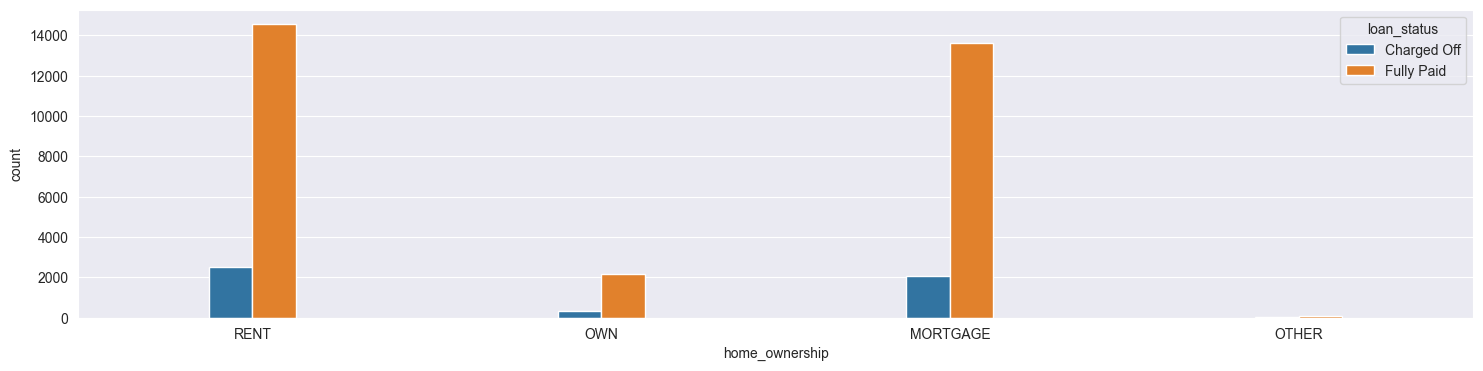

,RENT,OWN,MORTGAGE,OTHER
0,14.749487,13.812375,13.126552,19.148936


In [459]:
countplot_loan_status ('home_ownership')
xx = calculate_percentage_chargedoff ('home_ownership')
xx
#Analysis:- Those who are in others and rented category are having very high chance to default.

### Relationship between addr_state and Loan Status

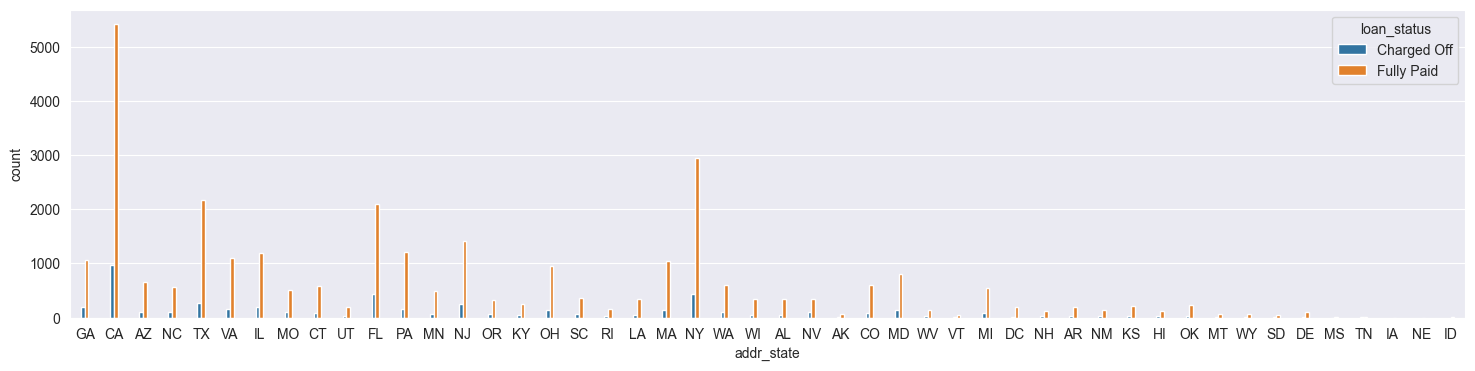

,GA,CA,AZ,NC,TX,VA,IL,MO,CT,UT,FL,PA,MN,NJ,OR,KY,OH,SC,RI,LA,MA,NY,WA,WI,AL,NV,AK,CO,MD,WV,VT,MI,DC,NH,AR,NM,KS,HI,OK,MT,WY,SD,DE,MS,TN,IA,NE,ID
0,15.482841,15.259537,13.984169,14.583333,11.12923,12.787927,13.540912,15.599343,11.926606,14.41048,17.238659,11.653314,12.99639,15.356929,15.869018,14.675768,12.591241,14.218009,13.513514,11.568123,11.769687,12.935617,15.277778,12.661499,11.838791,21.945701,20.547945,11.730205,14.736842,12.738854,12.765957,13.884555,6.896552,14.864865,11.574074,17.177914,10.300429,16.993464,13.602941,12.676056,4.0,18.181818,10.47619,5.555556,20.0,0.0,0.0,0.0


In [49]:
countplot_loan_status ('addr_state')
xx = calculate_percentage_chargedoff ('addr_state')
xx
#Analysis:- State of CA has the highest number of defaulters by number and by percentage state of FL(Florida) has hoghest number of
#Charged off loans.

### Relationship between pub_rec_bankruptcies and loan_status

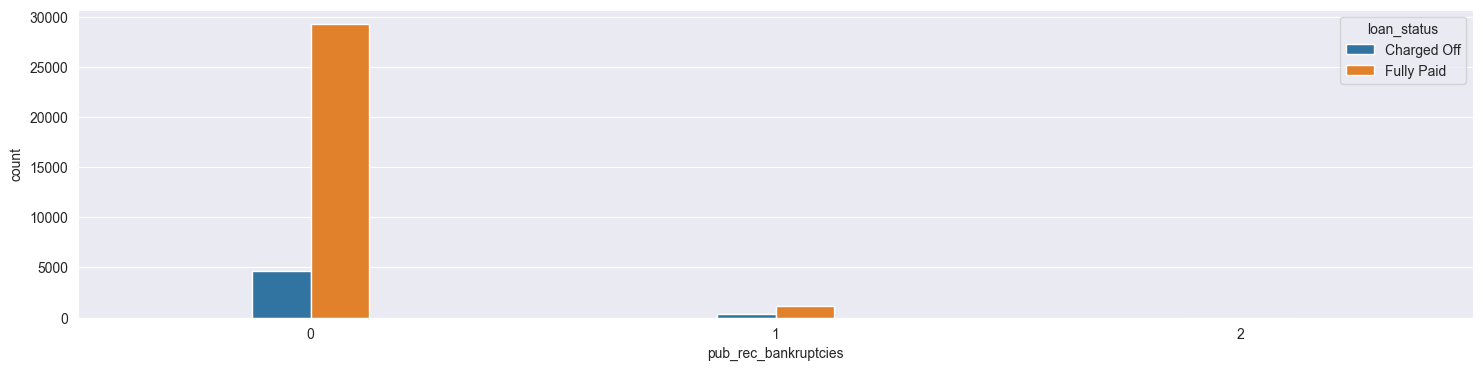

,0,1,2
0,13.658623,21.20383,40.0


In [50]:
countplot_loan_status ('pub_rec_bankruptcies')
xx = calculate_percentage_chargedoff ('pub_rec_bankruptcies')
xx
#Analysis:- From this analysis we got that more bancruptcy record, more chance to get defaulters

### Annual Income vs Loan Status Analysis

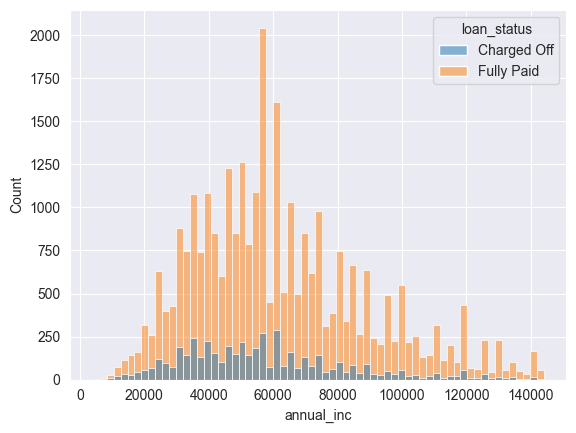

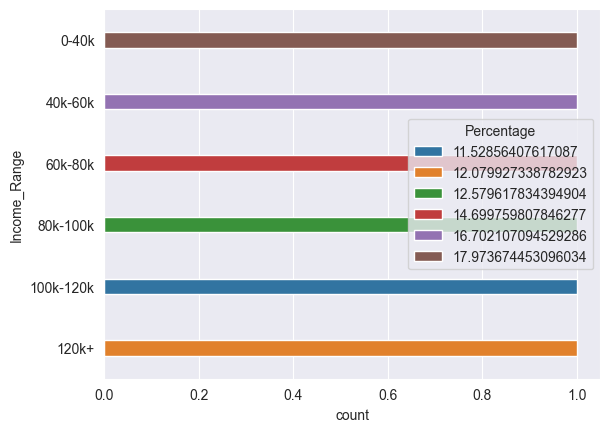

,Defaulter_Count,Loan_Paid_Count,Total,Percentage,Income_Range
0,1939,10788,12727,17.973674,0-40k
1,1728,10346,12074,16.702107,40k-60k
2,918,6245,7163,14.699760,60k-80k
3,474,3768,4242,12.579618,80k-100k
4,224,1943,2167,11.528564,100k-120k
5,133,1101,1234,12.079927,120k+


In [51]:
#Annual Income is a continous variable thus we need to break them in interval and then we can plot them
histplot_continous_vs_loan_status ('annual_inc')

#Creating a frequncy distribution table with charged off ratio to plot and calculate relation of annual income
def create_annual_income_distn_data () -> dict:
    d={}
    c_count,p_count=0,0
    for x in df['annual_inc'].unique().tolist():
        if (x >= 0 and x <= 40000):
            c_count = c_count + len(df[(df['loan_status'] == 'Charged Off') & ((df['annual_inc'] >= 0) & ((df['annual_inc'] <= 40000)))])
            p_count = p_count + len(df[(df['loan_status'] == 'Fully Paid') & ((df['annual_inc'] >= 0) & ((df['annual_inc'] <= 40000)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['0-40k'] = [c_count,p_count,t_count,percentage]
        elif (x > 40000 and x <= 60000):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['annual_inc'] > 40000 ) & ((df['annual_inc'] <= 60000)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['annual_inc'] > 40000) & ((df['annual_inc'] <= 60000)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['40k-60k'] = [c_count,p_count,t_count,percentage]
        elif (x > 60000 and x <= 80000):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['annual_inc'] > 60000) & ((df['annual_inc'] <= 80000)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['annual_inc'] > 60000) & ((df['annual_inc'] <= 80000)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['60k-80k'] = [c_count,p_count,t_count,percentage]
        elif (x > 80000 and x <= 100000):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['annual_inc'] > 80000) & ((df['annual_inc'] <= 100000)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['annual_inc'] > 80000) & ((df['annual_inc'] <= 100000)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['80k-100k'] = [c_count,p_count,t_count,percentage]
        elif (x > 100000 and x <= 120000):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['annual_inc'] > 100000) & ((df['annual_inc'] <= 120000)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['annual_inc'] > 100000) & ((df['annual_inc'] <= 120000)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['100k-120k'] = [c_count,p_count,t_count,percentage]
        elif (x > 120000 ):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & (df['annual_inc'] > 120000)])
            p_count =len(df[(df['loan_status'] == 'Fully Paid') & (df['annual_inc'] > 120000)])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['120k+'] = [c_count,p_count,t_count,percentage]
    return d;
dd = create_annual_income_distn_data ()
cols = ['Defaulter_Count', 'Loan_Paid_Count', 'Total', 'Percentage']
cc = pd.DataFrame.from_dict(dd,orient='index',columns=cols)
cc['Income_Range'] = cc.index
cc = cc.reset_index(drop=True)
#Plotting a countplot
sns.countplot (y='Income_Range',data=cc,width=0.25,hue='Percentage',palette=sns.color_palette())
plt.show()
cc
#Analysis:- Incomerange between 0 to 40k has the most chance to default. Even by percentage also we can see the same.

### Credit utilization vs Loan Status Analysis

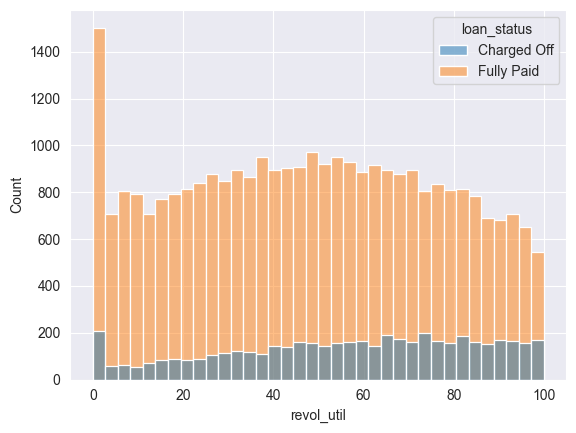

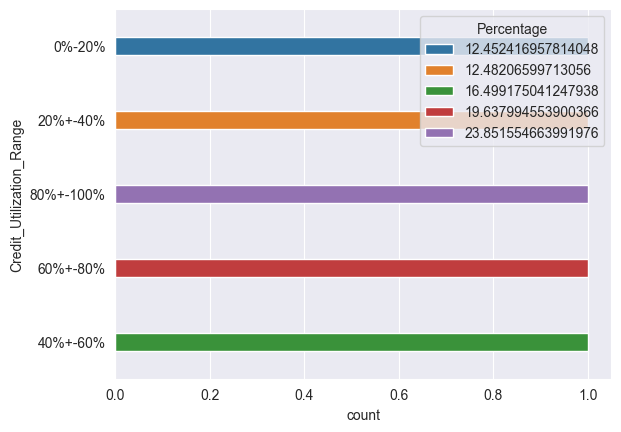

,Defaulter_Count,Loan_Paid_Count,Total,Percentage,Credit_Utilization_Range
0,2388,19177,21565,12.452417,0%-20%
1,783,6273,7056,12.482066,20%+-40%
2,1189,4985,6174,23.851555,80%+-100%
3,1226,6243,7469,19.637995,60%+-80%
4,1100,6667,7767,16.499175,40%+-60%


In [56]:
histplot_continous_vs_loan_status ('revol_util')

#Creating a frequncy distribution table with charged off ratio to plot and calculate relation of annual income
def create_revol_util_distn_data () -> dict:
    d={}
    c_count,p_count=0,0
    for x in df['revol_util'].unique().tolist():
        if (x >= 0 and x <= 20):
            c_count = c_count + len(df[(df['loan_status'] == 'Charged Off') & ((df['revol_util'] >= 0) & ((df['revol_util'] <= 20)))])
            p_count = p_count + len(df[(df['loan_status'] == 'Fully Paid') & ((df['revol_util'] >= 0) & ((df['revol_util'] <= 20)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['0%-20%'] = [c_count,p_count,t_count,percentage]
        elif (x > 20 and x <= 40):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['revol_util'] > 20) & ((df['revol_util'] <= 40)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['revol_util'] > 20) & ((df['revol_util'] <= 40)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['20%+-40%'] = [c_count,p_count,t_count,percentage]
        elif (x > 40 and x <= 60):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['revol_util'] > 40) & ((df['revol_util'] <= 60)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['revol_util'] > 40) & ((df['revol_util'] <= 60)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['40%+-60%'] = [c_count,p_count,t_count,percentage]
        elif (x > 60 and x <= 80):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['revol_util'] > 60) & ((df['revol_util'] <= 80)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['revol_util'] > 60) & ((df['revol_util'] <= 80)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['60%+-80%'] = [c_count,p_count,t_count,percentage]
        elif (x > 80 and x <= 100):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['revol_util'] > 80) & ((df['revol_util'] <= 100)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['revol_util'] > 80) & ((df['revol_util'] <= 100)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['80%+-100%'] = [c_count,p_count,t_count,percentage]
    return d;
dd = create_revol_util_distn_data ()
cols = ['Defaulter_Count', 'Loan_Paid_Count', 'Total', 'Percentage']
cc = pd.DataFrame.from_dict(dd,orient='index',columns=cols)
cc['Credit_Utilization_Range'] = cc.index
cc = cc.reset_index(drop=True)
#Plotting a countplot
sns.countplot (y='Credit_Utilization_Range',data=cc,width=0.25,hue='Percentage',palette=sns.color_palette())
plt.show()
cc
#Analysis:- High Credit utilization leads to higer number of defaulters. 80+ to 100% has the most defaulters.

### Interest Rate vs Loan Status Analysis

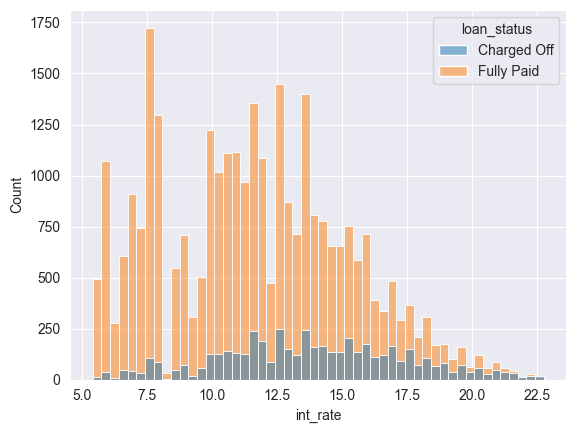

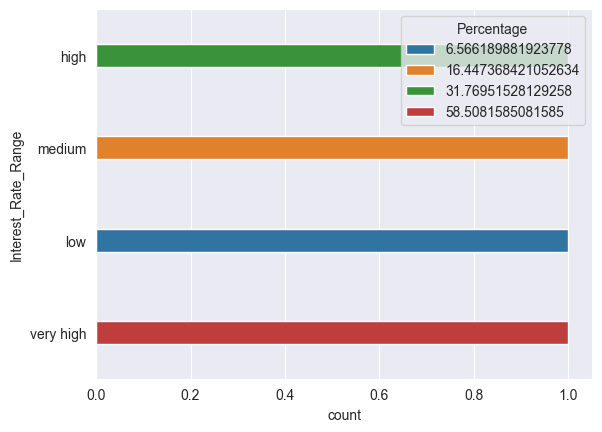

,Defaulter_Count,Loan_Paid_Count,Total,Percentage,Interest_Rate_Range
0,1632,5137,6769,31.769515,high
1,2375,14440,16815,16.447368,medium
2,684,10417,11101,6.566190,low
3,251,429,680,58.508159,very high


In [463]:
#Interest rate is a continous variable thus we need to break them in interval and then we can plot them
#Histplopt with hue to identify the overall status.
histplot_continous_vs_loan_status ('int_rate')
def create_int_rate_distn_data () -> dict:
    d={}
    c_count,p_count=0,0
    for x in df['int_rate'].unique().tolist():
        if (x >= 0 and x <= 5):
            c_count = c_count + len(df[(df['loan_status'] == 'Charged Off') & ((df['int_rate'] >= 0) & ((df['int_rate'] <= 5)))])
            p_count = p_count + len(df[(df['loan_status'] == 'Fully Paid') & ((df['int_rate'] >= 0) & ((df['int_rate'] <= 5)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['very low'] = [c_count,p_count,t_count,percentage]
        elif (x > 5 and x <= 10):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['int_rate'] > 5 ) & ((df['int_rate'] <= 10)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['int_rate'] > 5) & ((df['int_rate'] <= 10)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['low'] = [c_count,p_count,t_count,percentage]
        elif (x > 10 and x <= 15):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['int_rate'] > 10) & ((df['int_rate'] <= 15)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['int_rate'] > 10) & ((df['int_rate'] <= 15)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['medium'] = [c_count,p_count,t_count,percentage]
        elif (x > 15 and x <= 20):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['int_rate'] > 15) & ((df['int_rate'] <= 20)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['int_rate'] > 15) & ((df['int_rate'] <= 20)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['high'] = [c_count,p_count,t_count,percentage]
        elif (x > 20 ):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & (df['int_rate'] > 20)])
            p_count =len(df[(df['loan_status'] == 'Fully Paid') & (df['int_rate'] > 20)])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['very high'] = [c_count,p_count,t_count,percentage]
    return d;

dd = create_int_rate_distn_data ()
cols = ['Defaulter_Count', 'Loan_Paid_Count', 'Total', 'Percentage']
cc = pd.DataFrame.from_dict(dd,orient='index',columns=cols)
cc['Interest_Rate_Range'] = cc.index
cc = cc.reset_index(drop=True)
#Plotting a countplot
sns.countplot (y='Interest_Rate_Range',data=cc,width=0.25,hue='Percentage',palette=sns.color_palette())
plt.show()
#df.head(20)
cc
#Analysis :- We can clearly see that high interest rate leads to more drfaults.

### Relation between Funded amount and loan status

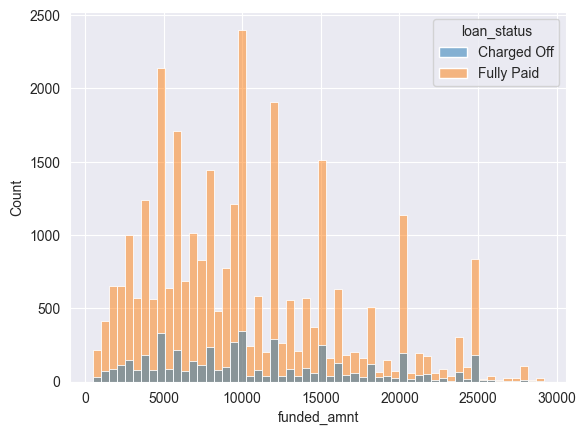

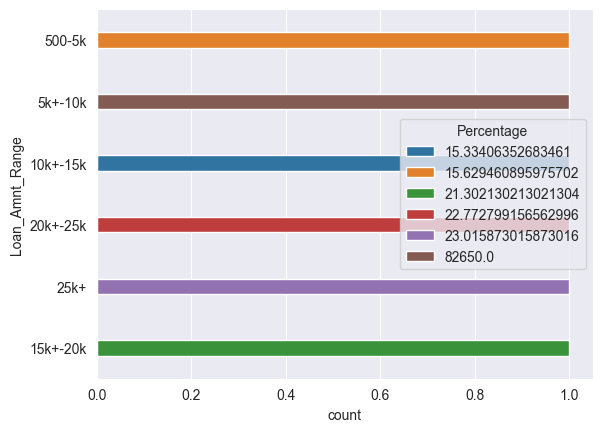

,Defaulter_Count,Loan_Paid_Count,Total,Percentage,Loan_Amnt_Range
0,5146,32925,38071,15.629461,500-5k
1,1653,2,1655,82650.000000,5k+-10k
2,980,6391,7371,15.334064,10k+-15k
3,432,1897,2329,22.772799,20k+-25k
4,58,252,310,23.015873,25k+
5,710,3333,4043,21.302130,15k+-20k


In [464]:
#There are two types of funded amount --> Funded by company
#Funded amnt INV --> Funded by investors bys Company
#Upon checking we got that, both are showing the same data
#So we are taking funded amount only for our calculation

histplot_continous_vs_loan_status ('funded_amnt')
df['funded_amnt'].describe()

def create_funded_amnt_distn_data () -> dict:
    d={}
    c_count,p_count=0,0
    for x in df['funded_amnt'].unique().tolist():
        if (x >= 500 and x <= 5000):
            c_count = c_count + len(df[(df['loan_status'] == 'Charged Off') & ((df['funded_amnt'] >= 500) & ((df['funded_amnt'] <= 5000)))])
            p_count = p_count + len(df[(df['loan_status'] == 'Fully Paid') & ((df['funded_amnt'] >= 500) & ((df['funded_amnt'] <= 5000)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['500-5k'] = [c_count,p_count,t_count,percentage]
        elif (x > 5000 and x <= 10000):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['funded_amnt'] > 5000 ) & ((df['funded_amnt'] <= 10000)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['funded_amnt'] > 5000) & ((df['annual_inc'] <= 10000)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['5k+-10k'] = [c_count,p_count,t_count,percentage]
        elif (x > 10000 and x <= 15000):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['funded_amnt'] > 10000) & ((df['funded_amnt'] <= 15000)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['funded_amnt'] > 10000) & ((df['funded_amnt'] <= 15000)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['10k+-15k'] = [c_count,p_count,t_count,percentage]
        elif (x > 15000 and x <= 20000):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['funded_amnt'] > 15000) & ((df['funded_amnt'] <= 20000)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['funded_amnt'] > 15000) & ((df['funded_amnt'] <= 20000)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['15k+-20k'] = [c_count,p_count,t_count,percentage]
        elif (x > 20000 and x <= 25000):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['funded_amnt'] > 20000) & ((df['funded_amnt'] <= 25000)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['funded_amnt'] > 20000) & ((df['funded_amnt'] <= 25000)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['20k+-25k'] = [c_count,p_count,t_count,percentage]
        elif (x > 25000 ):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & (df['funded_amnt'] > 25000)])
            p_count =len(df[(df['loan_status'] == 'Fully Paid') & (df['funded_amnt'] > 25000)])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['25k+'] = [c_count,p_count,t_count,percentage]
    return d;
dd = create_funded_amnt_distn_data ()
cols = ['Defaulter_Count', 'Loan_Paid_Count', 'Total', 'Percentage']
cc = pd.DataFrame.from_dict(dd,orient='index',columns=cols)
cc['Loan_Amnt_Range'] = cc.index
cc = cc.reset_index(drop=True)
#Plotting a countplot
sns.countplot (y='Loan_Amnt_Range',data=cc,width=0.25,hue='Percentage',palette=sns.color_palette())
plt.show()
#df.head(20)
cc
#Analysis:- Funded amount between 5k to 1ok has the highest number of defaulters.Loan amount 15k and above are having high chances
#to be bad loans.

### Loan status vs dti relationship

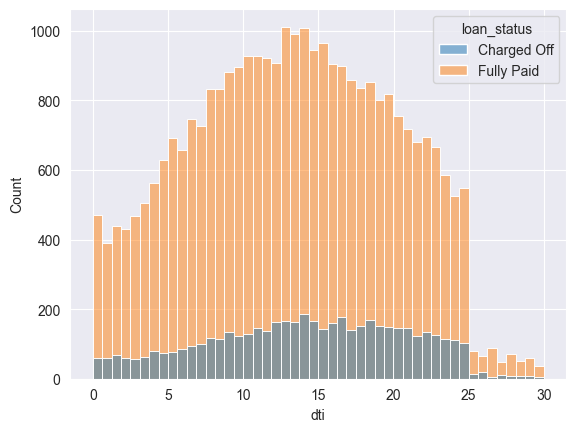

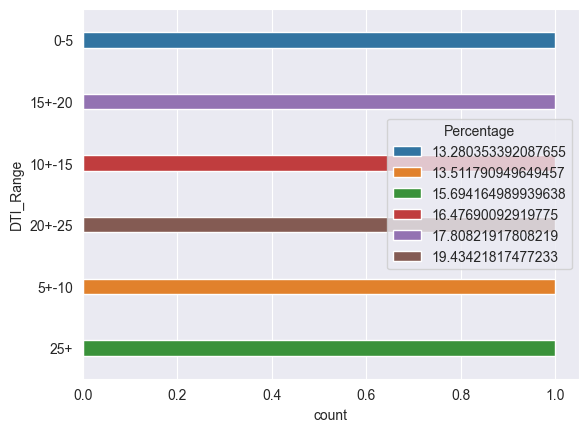

,Defaulter_Count,Loan_Paid_Count,Total,Percentage,DTI_Range
0,12266,92362,104628,13.280353,0-5
1,1235,6935,8170,17.808219,15+-20
2,1259,7641,8900,16.476901,10+-15
3,1003,5161,6164,19.434218,20+-25
4,848,6276,7124,13.511791,5+-10
5,78,497,575,15.694165,25+


In [465]:
#dti stands for debt to income ratio and it is a big indicator for giving an overview on defaulters.
#As it is a continous variable, we are plotting histogram

histplot_continous_vs_loan_status ('dti')
#Checking min and max to create class interval for frequncy distribution
df['dti'].describe()
#Method fpr frequncy distribution
def create_dti_distn_data () -> dict:
    d={}
    c_count,p_count=0,0
    for x in df['dti'].unique().tolist():
        if (x >= 0 and x <= 5):
            c_count = c_count + len(df[(df['loan_status'] == 'Charged Off') & ((df['dti'] >= 0) & ((df['dti'] <= 5)))])
            p_count = p_count + len(df[(df['loan_status'] == 'Fully Paid') & ((df['dti'] >= 0) & ((df['dti'] <= 5)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['0-5'] = [c_count,p_count,t_count,percentage]
        elif (x > 5 and x <= 10):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['dti'] > 5 ) & ((df['dti'] <= 10)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['dti'] > 5) & ((df['dti'] <= 10)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['5+-10'] = [c_count,p_count,t_count,percentage]
        elif (x > 10 and x <= 15):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['dti'] > 10) & ((df['dti'] <= 15)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid') & ((df['dti'] > 10) & ((df['dti'] <= 15)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['10+-15'] = [c_count,p_count,t_count,percentage]
        elif (x > 15 and x <= 20):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & ((df['dti'] > 15) & ((df['dti'] <= 20)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid')  & ((df['dti'] > 15) & ((df['dti'] <= 20)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['15+-20'] = [c_count,p_count,t_count,percentage]
        elif (x > 20 and x <= 25):
            c_count = len(df[(df['loan_status'] == 'Charged Off')  & ((df['dti'] > 20) & ((df['dti'] <= 25)))])
            p_count = len(df[(df['loan_status'] == 'Fully Paid')  & ((df['dti'] > 20) & ((df['dti'] <= 25)))])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['20+-25'] = [c_count,p_count,t_count,percentage]
        elif (x > 25 ):
            c_count = len(df[(df['loan_status'] == 'Charged Off') & (df['dti'] > 25)])
            p_count =len(df[(df['loan_status'] == 'Fully Paid') & (df['dti'] > 25)])
            t_count = c_count + p_count
            percentage = (c_count/p_count)*100
            d['25+'] = [c_count,p_count,t_count,percentage]
    return d;
dd = create_dti_distn_data ()
cols = ['Defaulter_Count', 'Loan_Paid_Count', 'Total', 'Percentage']
cc = pd.DataFrame.from_dict(dd,orient='index',columns=cols)
cc['DTI_Range'] = cc.index
cc = cc.reset_index(drop=True)
#Plotting a countplot
sns.countplot (y='DTI_Range',data=cc,width=0.25,hue='Percentage',palette=sns.color_palette())
plt.show()
#df.head(20)
cc
#Analysis:- DTI range between 20 to 25 has the most bad loans and count is started incresing from 15.

### Checking Correlation

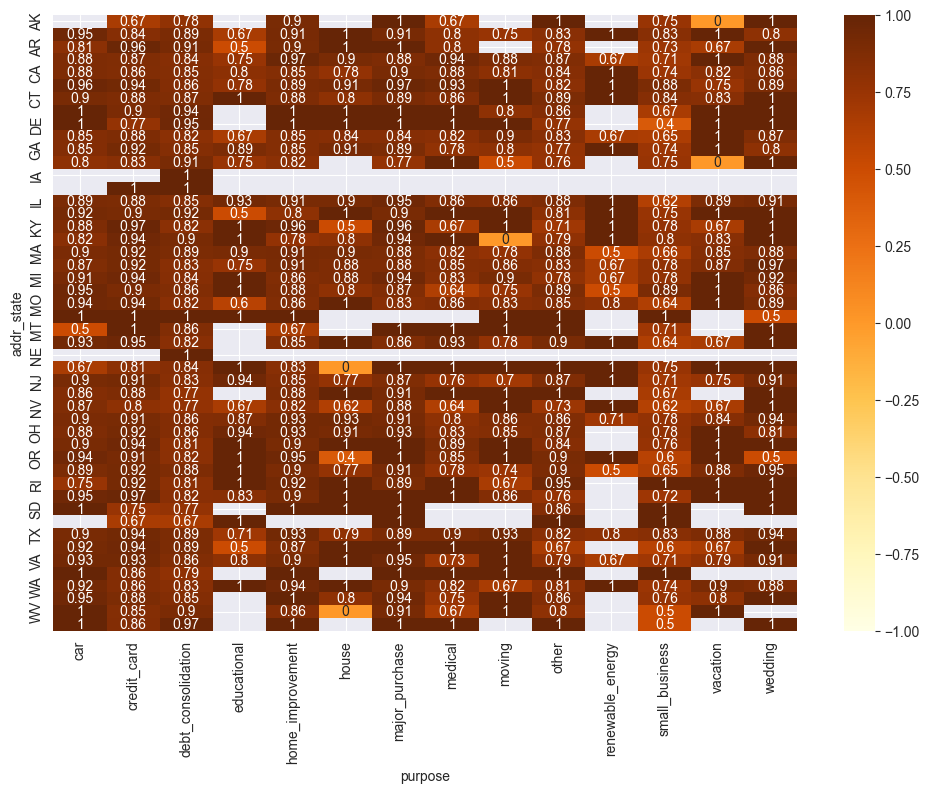

In [466]:
# Correlation between city and purpose
bivariate_analysis_categorical_data ('purpose', 'addr_state')
#Analysis:- There are some more red points at intersection. More red means more risk. Like Loan for credit card payment taken from Ohaio
#Another one is small business loans in DE,AR,CA

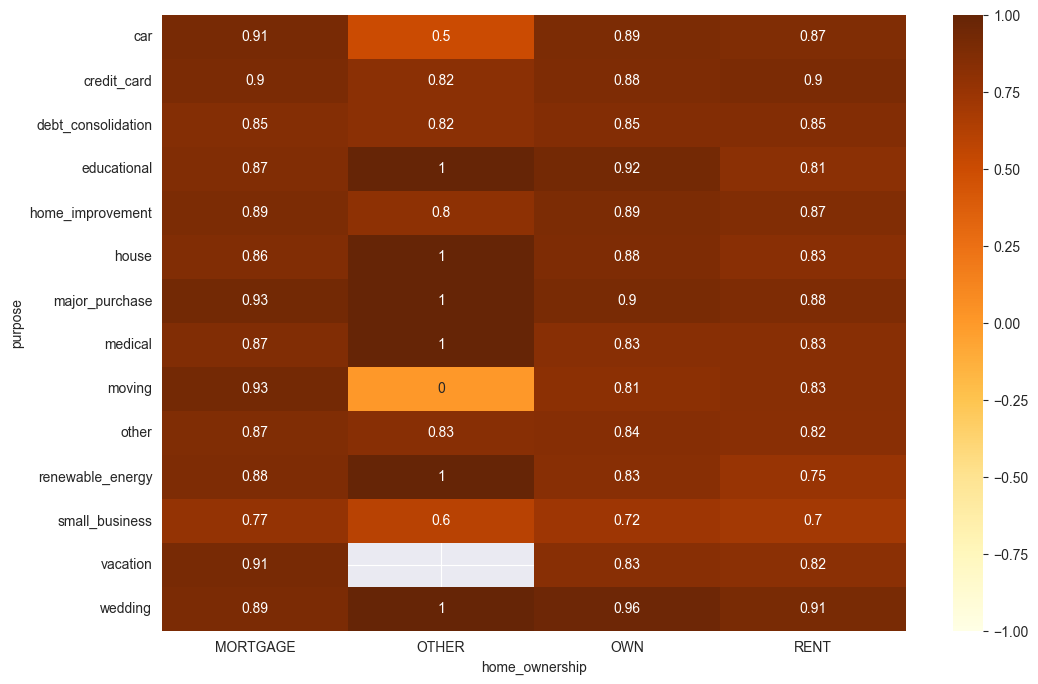

In [467]:
# Correlation between home and purpose
bivariate_analysis_categorical_data ('home_ownership','purpose')
#Analysis:- Home 

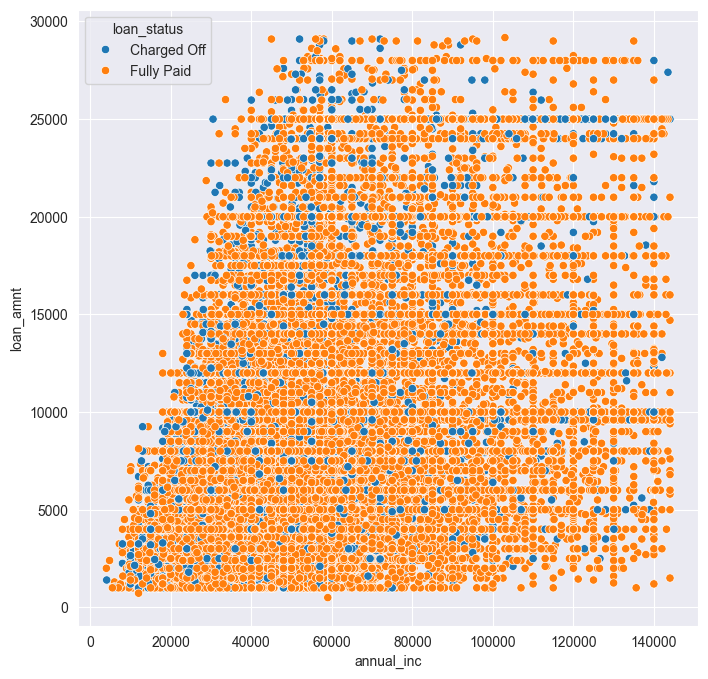

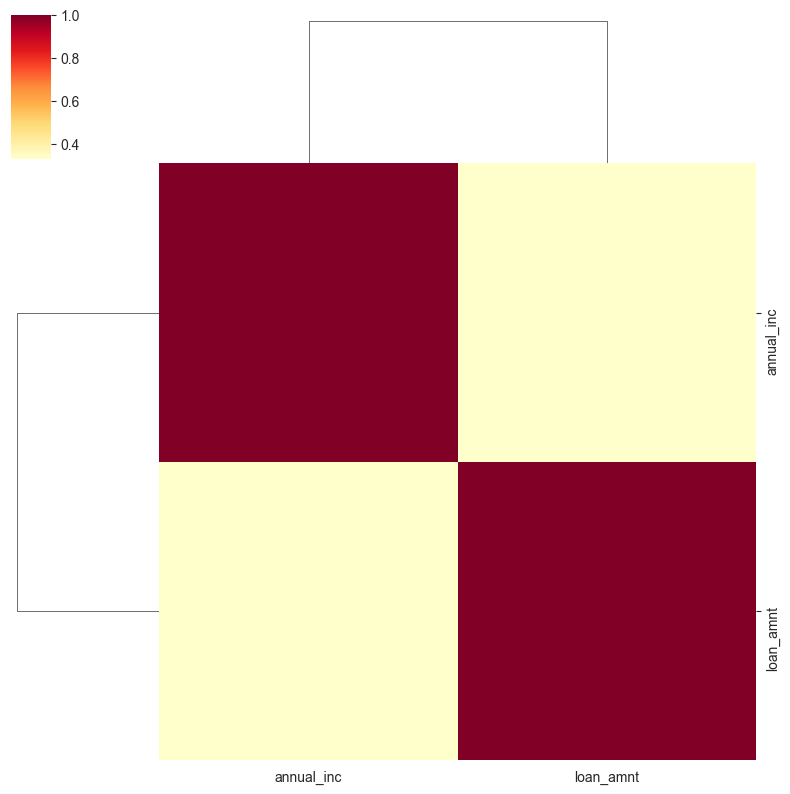

            annual_inc  loan_amnt
annual_inc    1.000000   0.330146
loan_amnt     0.330146   1.000000


In [468]:
#Relation between annual_inc and loan_amnt
bivariate_analysis_numerical_data ('annual_inc', 'loan_amnt')
#Analysis it is showing a positive correlation

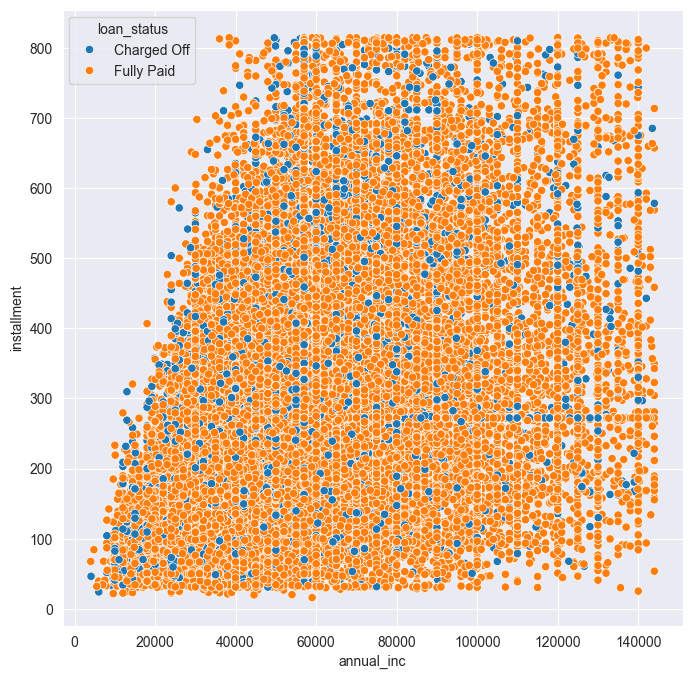

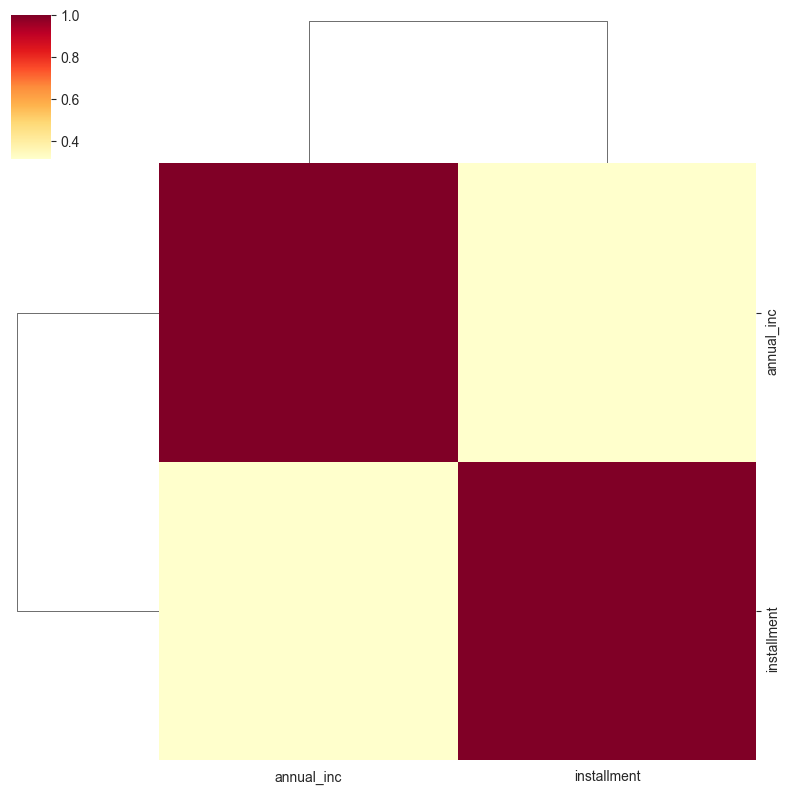

             annual_inc  installment
annual_inc     1.000000     0.312346
installment    0.312346     1.000000


In [469]:
#Relation between annual_inc and loan_amnt
bivariate_analysis_numerical_data ('annual_inc', 'installment')
#Analysis it is showing a positive correlation

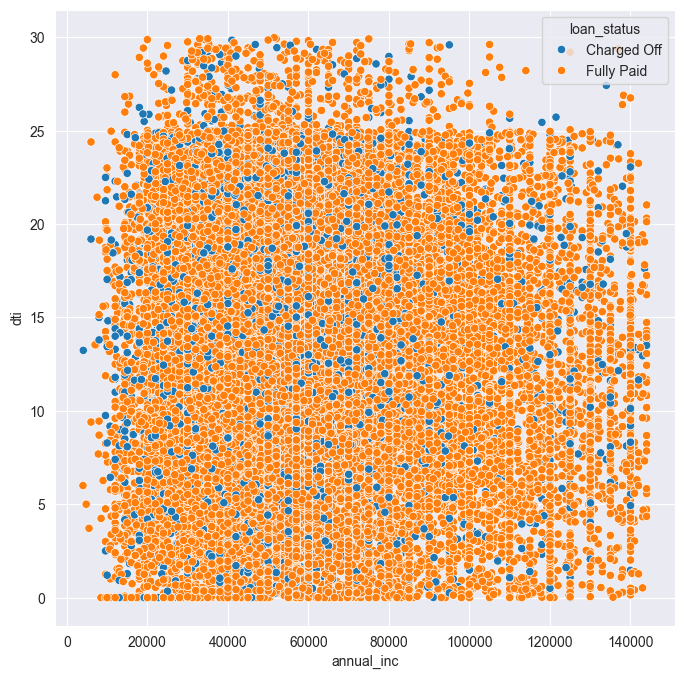

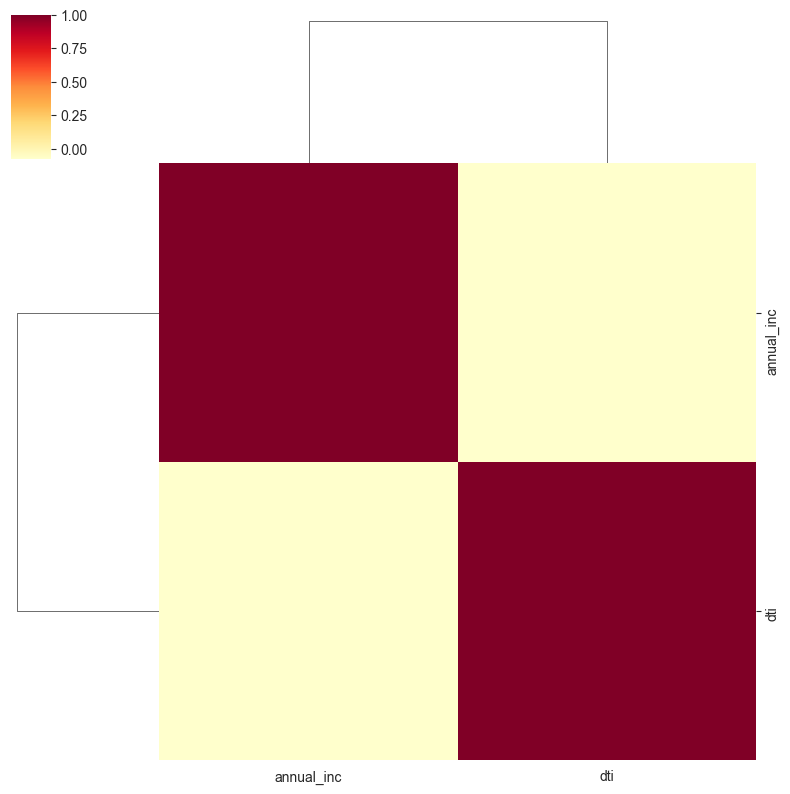

            annual_inc      dti
annual_inc     1.00000 -0.07515
dti           -0.07515  1.00000


In [470]:
#Relation between annual_inc and dti
bivariate_analysis_numerical_data ('annual_inc', 'dti')
#Analysis it is showing a positive correlation
#Analysis:- Negetive correlation

### Plotting Heatmap to check correlation between annual_inc','loan_amnt','int_rate','dti','funded_amnt','pub_rec_bankruptcies','installment','term'
This is a **correlation after grouping by loan_status_boolean to get final overall relation to draw a conclusion**.

### Bivariate and Multivariate Analysis Summary :-

- **60 months** tenure has more chances to default.

- Highest risk of charge off's are in the grades of **B and C**.Grade **F and G** have very high chances of charged off. Probablity of charged off is increasing from **A to G**.

- Highest Charge Offs are in the employee **length of 10 Years and above**. High probablity of Charge Off's whose income range is less than 1 years.

- The home_ownership status of **MORTGAGE** and are at the highest risk of Charge Offs. **MORTGAGE status** also has the highest range of loan amounts increasing the risk.

- Highest risk of Charge Off's are the purpose of **debt_consolidation**. **Small Business** applicants have high chances of getting charged off. **Renewable_energy** has lowest risk of Charge Off's in volume.

- Debt applications from **NV (Neveda)** have high risk of Charge Offs.

- Annual Income range of **0-40K** has the highest risk and income range **80000+** has less chances of charged off.

- More **Annual Income** leads to less **dti**

- More **income** leads to more **funded amount**

- High **credit utilization** leads to bad loan.

- The **Very High (15+)** interest rates are in risk of Charge Off.

In [ ]:
### Final Heatmap 

In [ ]:
#Plotting a heatmap with important numeric values for Overall Picture
#Final Verdict Plot
sns.set_style('darkgrid')
cr = df.loc[:, ['annual_inc','loan_amnt','int_rate','dti','funded_amnt','pub_rec_bankruptcies','installment','term','revol_util']].groupby(df['loan_status_boolean']).corr()
plt.figure(figsize = (18,8))
sns.heatmap(cr,vmax=1,vmin=-1,annot = True, cmap='YlOrRd')
plt.show()

#*** More darker the point with False, more the risk***

## Final Summary:-

Upon analyzing on all the points, We have derived some points which Lending Club can follow to minimize bad loans.

- **Giving loan to the applicants having annual income higer than 40K and low interest rate (below 15%**) may minimize the bad loand.

- **Smaller term (36 months) can minimize the bad loans**.

- **Loan grading has a significant impact on loans**.

- **Loan can be provided who has own house**.

- **Pupose like small business and another loan repayment** has most numbers of defaulters.

- **Public bankruptcy record must be 0 or 1**. Higher the record value, higher the risk of bad loan.

- Address Cities has lower impact on loan status as well.

- **High dti(15+)** leads to more bad loans thus loan funding should be made on annual income.

- Month and year has lower impact.

- **Credit Utilization Ratio (revol_util)** has a big significance. High utilization leads to bad loan. Thus Lending Club should provide
  loans to lower utilization rate applicants.